# Plotting agreement of the subjects over time from the combined workflows of Jet or Not and Box the Jet. Sorted by SOL/ HEK event
## Need: Meta_data_subjects.json and question_reducer_combined_workflows.csv
This jupyter notebook plots the results of the Jet or No question, the Jet distribution over the subjects of the reported HEK event  
Since the subjects are shorter than research to the duration of solar jets has shown us, we expect jets appearing in multiplesubjects.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

import datetime
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import Image

from BoxTheJets.aggregation import QuestionResult, MetaFile

%matplotlib inline

Read in the subject files made by make_Tc_csvfiles.py  

In [4]:
# initiate the filled data set as a class
data_Tc = QuestionResult('question_reducer_combined_workflows.csv')

# Calculate the agreement
agreement_Tc, jet_mask_Tc, non_jet_mask_Tc, Ans_Tc = data_Tc.Agr_mask(data_Tc.data)

subjects = data_Tc.subjects

metafile = MetaFile('Meta_data_subjects.json')

In [3]:
def make_SOL_folder(SOL_name):
    path = 'SOL/Agreement_{}/'.format(SOL_name)
    # check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist:
        os.makedirs(path)
        print("Agreement_{} directory is created".format(SOL_name))


make_SOL_folder('SOL_Tc')

Agreement_SOL_Tc directory is created


In [6]:
def plot_agreement(sol_event, obs_time, agreement, jet_mask, non_jet_mask):
    fig, ax = plt.subplots(dpi=150, figsize=(5, 3))
    try:
        plt.bar(obs_time[non_jet_mask], agreement[non_jet_mask],
                width=0.003, alpha=0.15, color='grey')
        plt.scatter(obs_time[non_jet_mask], [1]*len(obs_time[non_jet_mask]),
                    color="grey", alpha=0.45, s=5)
    except:
        print('happens')  # Not printed so if only yes jets this try execept does not work breaking the plot
    pass

    try:
        plt.bar(obs_time[jet_mask], agreement[jet_mask], width=0.003, alpha=0.25, color='green')
        plt.scatter(obs_time[jet_mask], [1]*len(obs_time[jet_mask]), color="green", alpha=0.65, s=5)
    except:
        print('No jets in this event')

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.title(sol_event)
    plt.xlabel('Time')
    plt.ylabel('Agreement')
    plt.ylim(0, 1.7)
    # Legend
    d1 = Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=5)
    d2 = Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=5)
    m3, = ax.plot([], [], c='grey', alpha=0.25, marker='s', markersize=10,
                  fillstyle='left', linestyle='none')
    m4, = ax.plot([], [], c='green', alpha=0.25, marker='s', markersize=10,
                  fillstyle='right', linestyle='none')
    ax.legend(((d1), (d2), (m3, m4)), ('Contains jet', 'Contains no jet', 'Agreement'), numpoints=1, labelspacing=0.3,
              loc='upper right', fontsize=9)
    #
    plt.savefig('SOL/Agreement_SOL_Tc/'+sol_event.replace(':', '-')+'.png', bbox_inches="tight")
    plt.show()

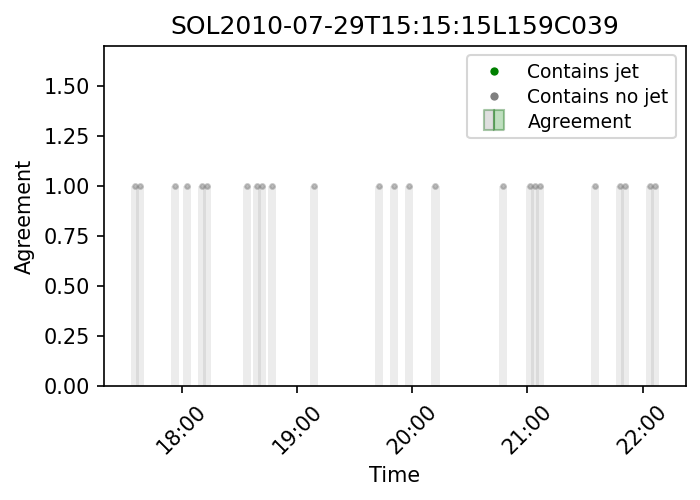

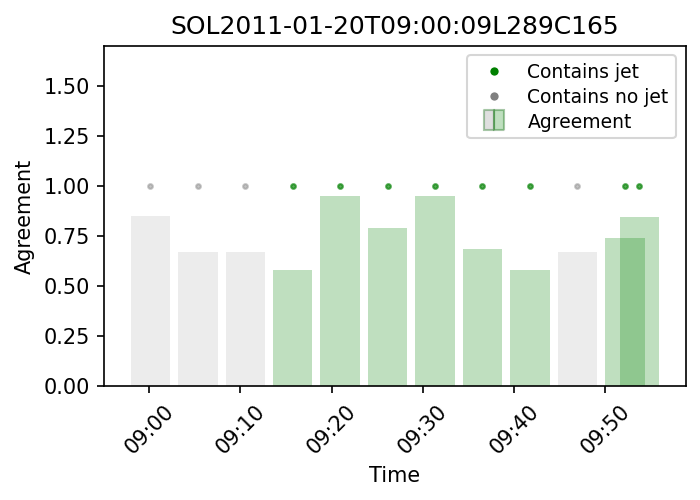

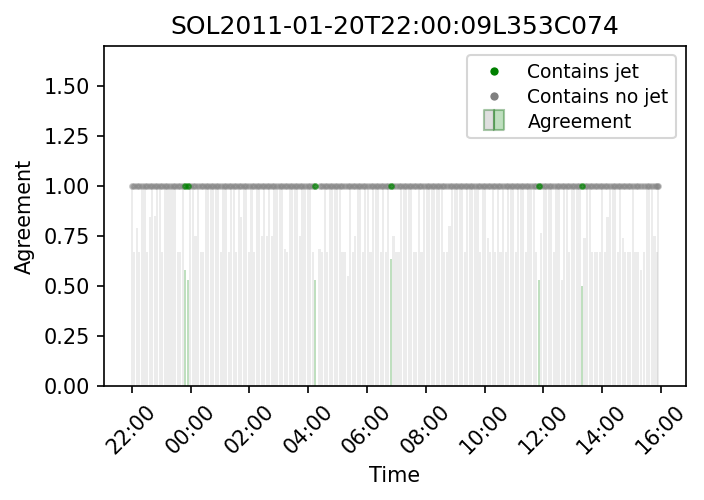

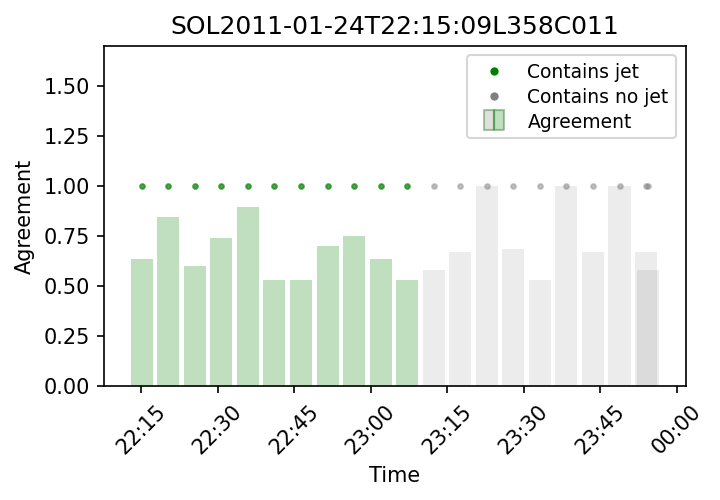

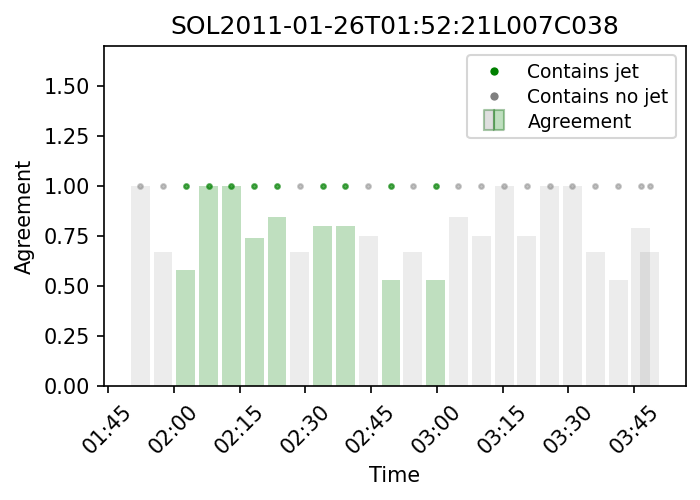

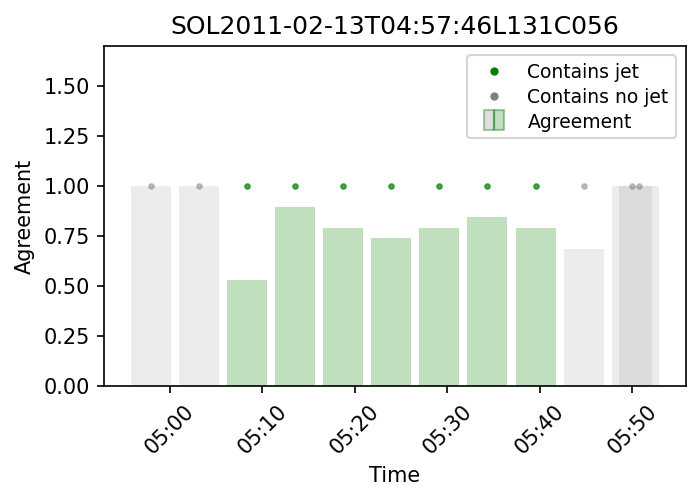

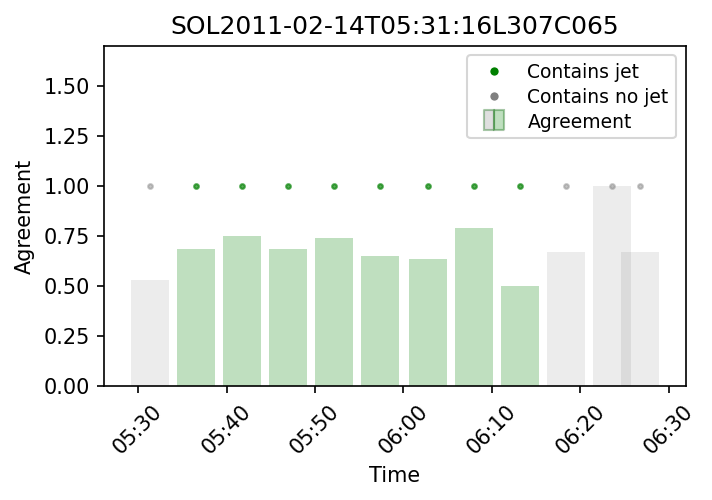

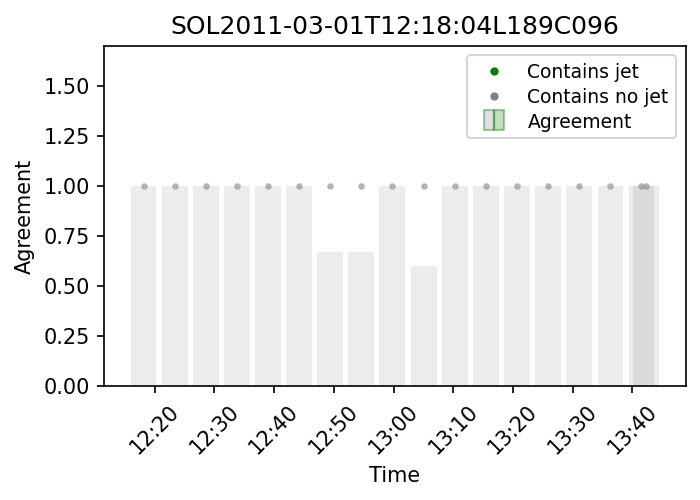

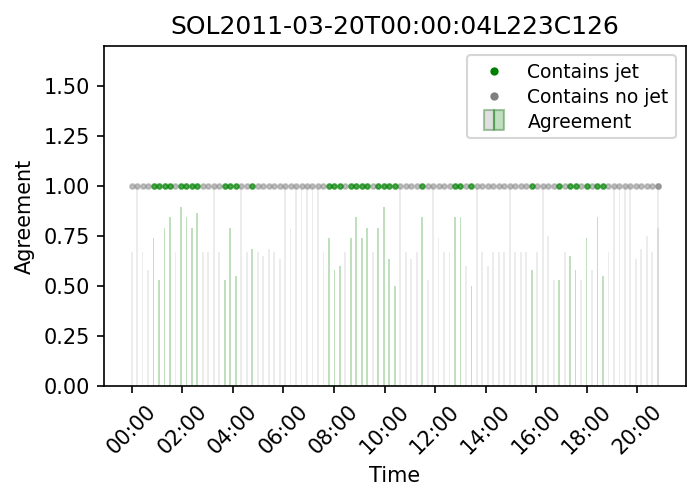

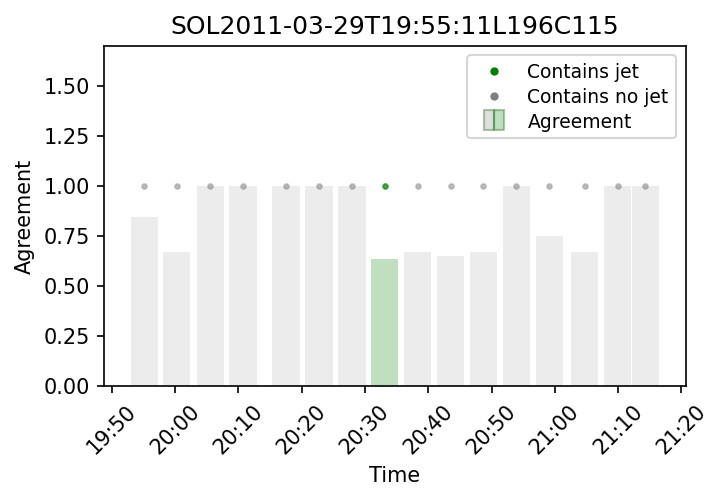

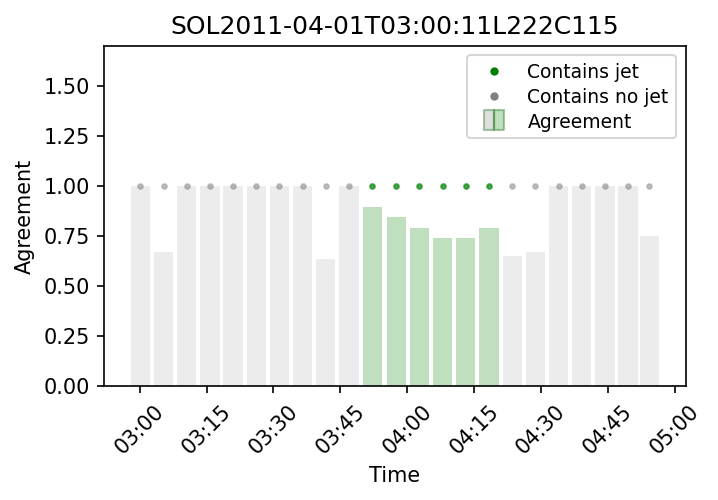

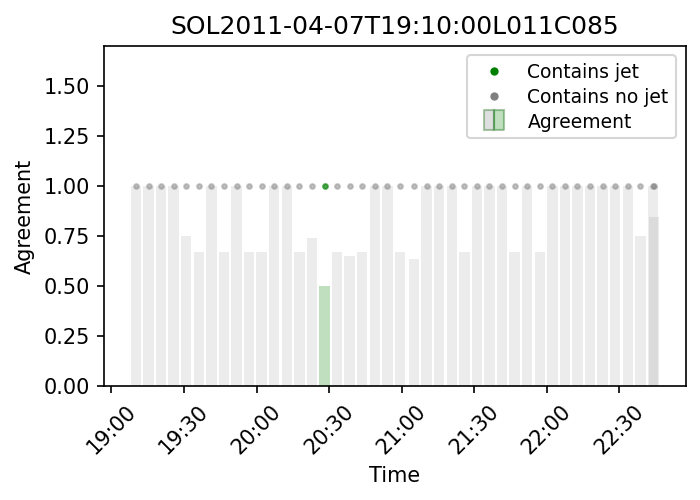

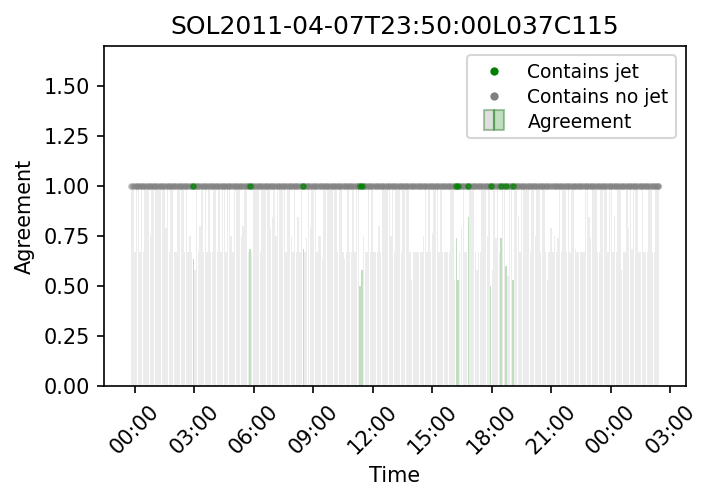

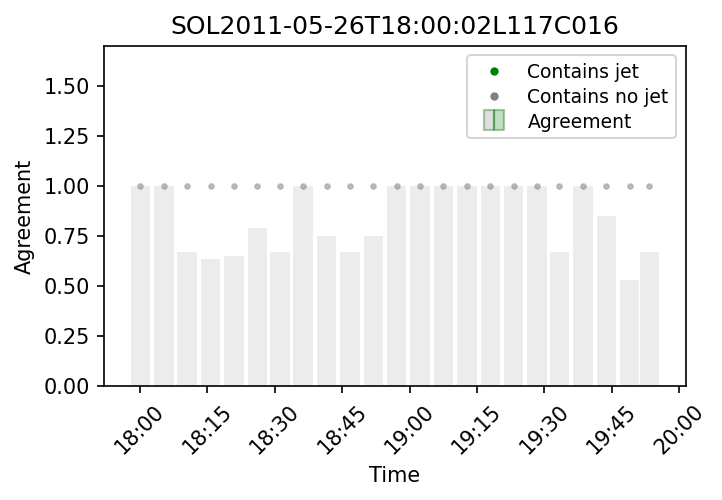

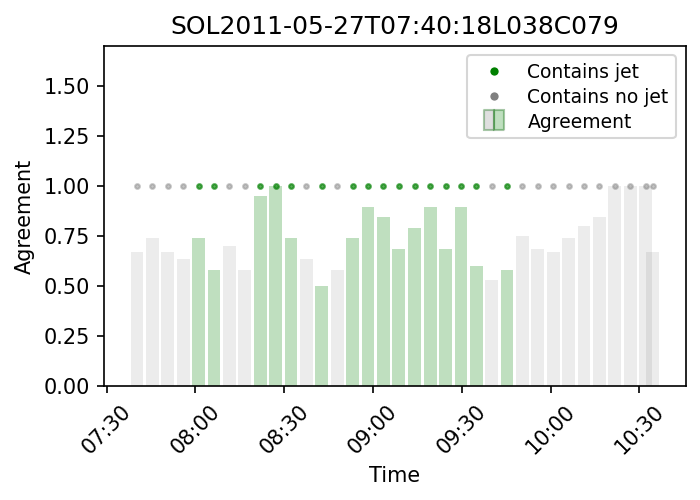

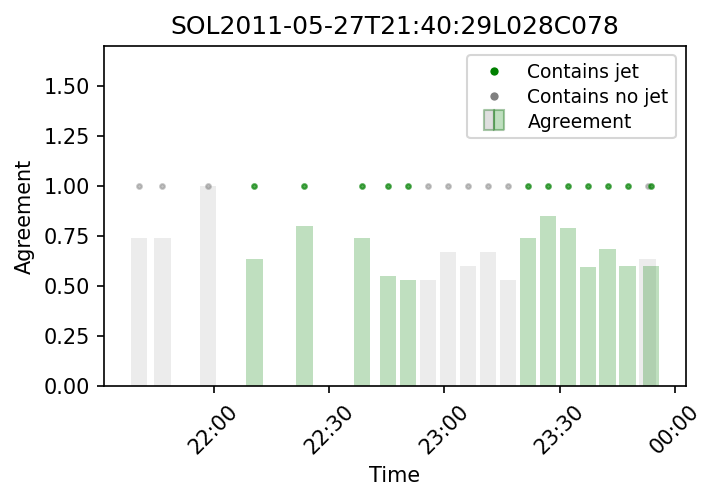

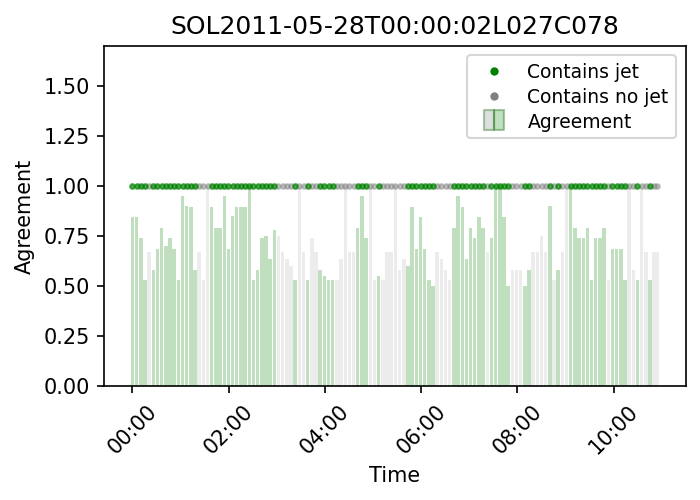

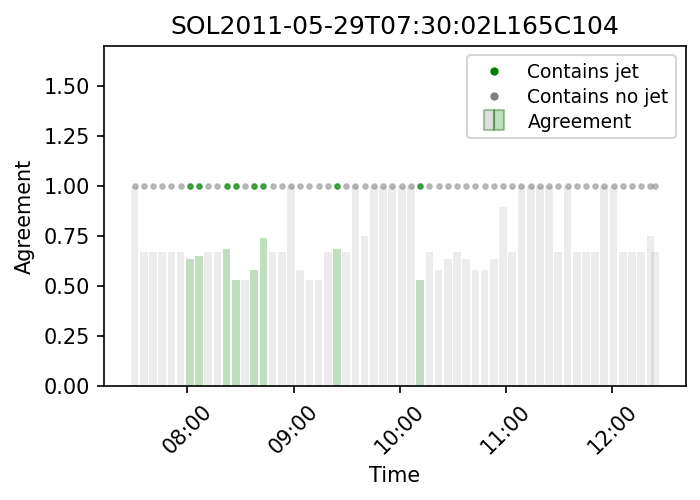

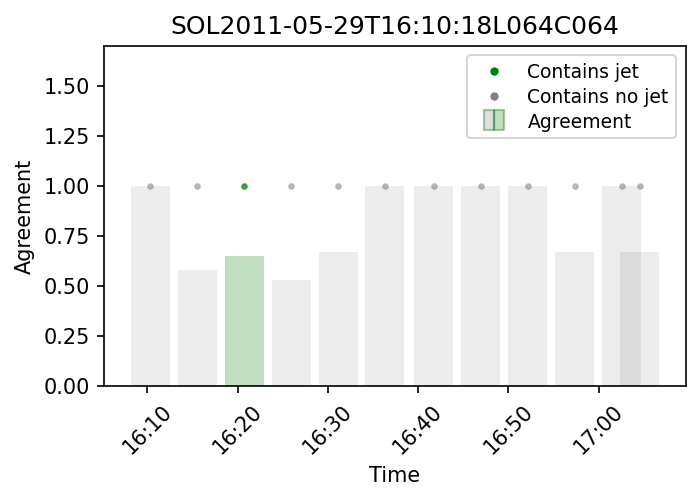

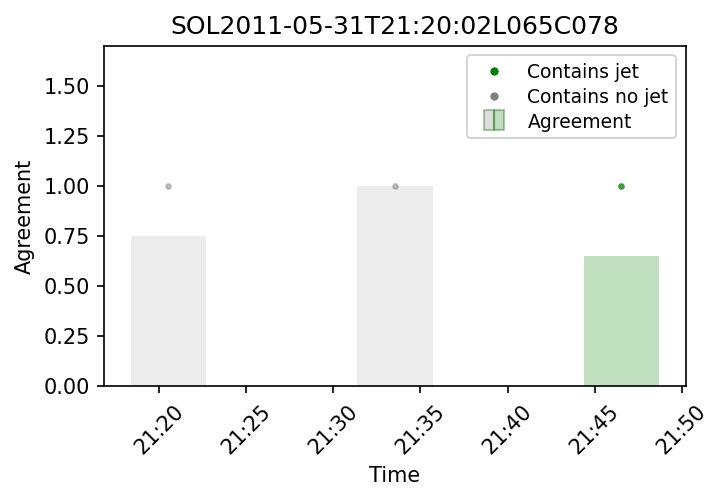

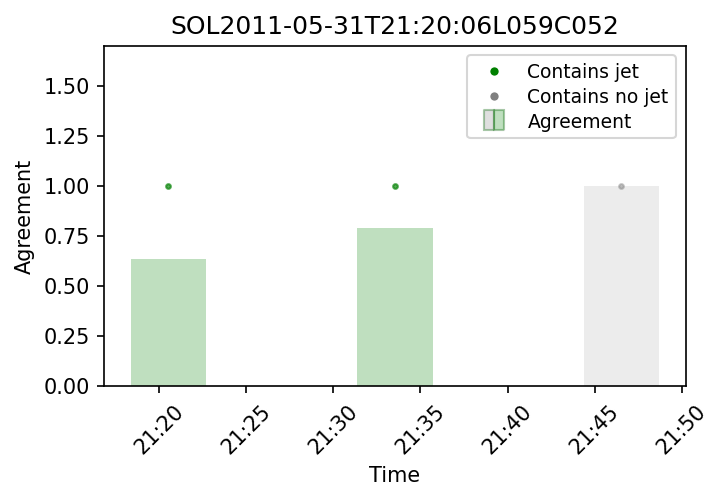

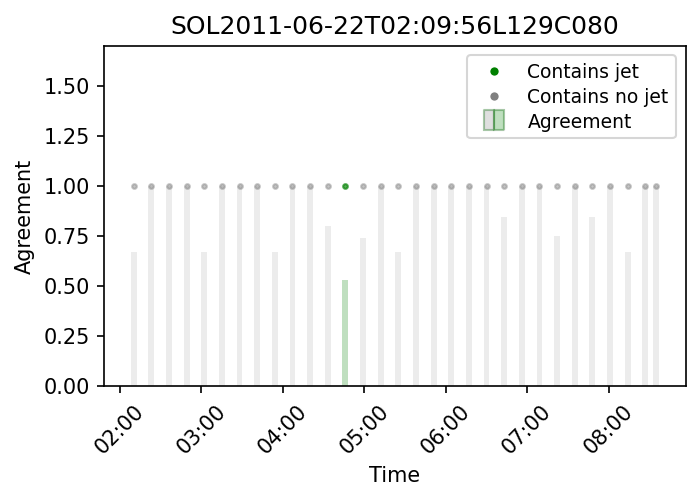

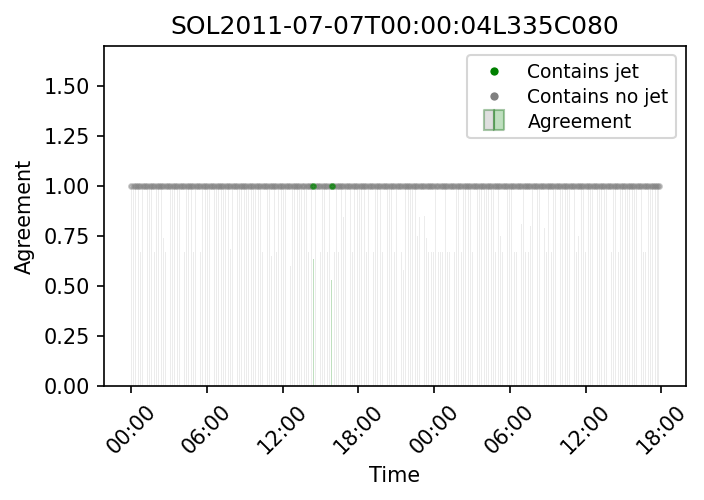

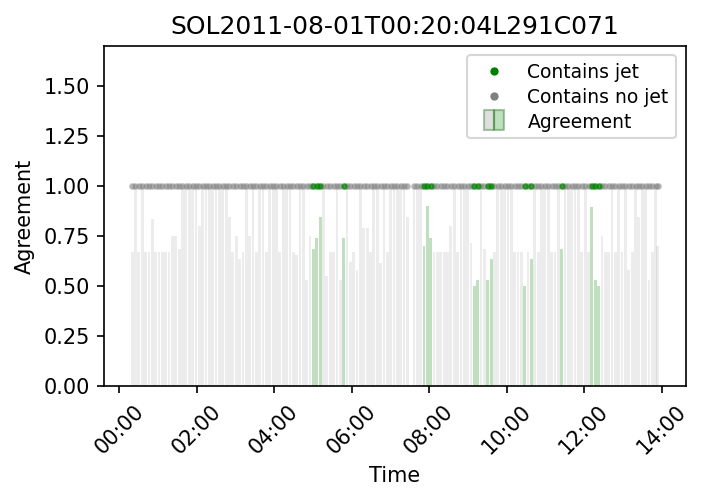

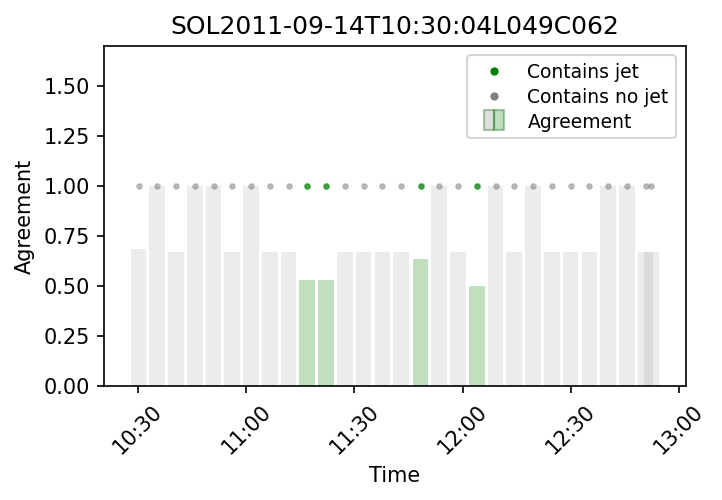

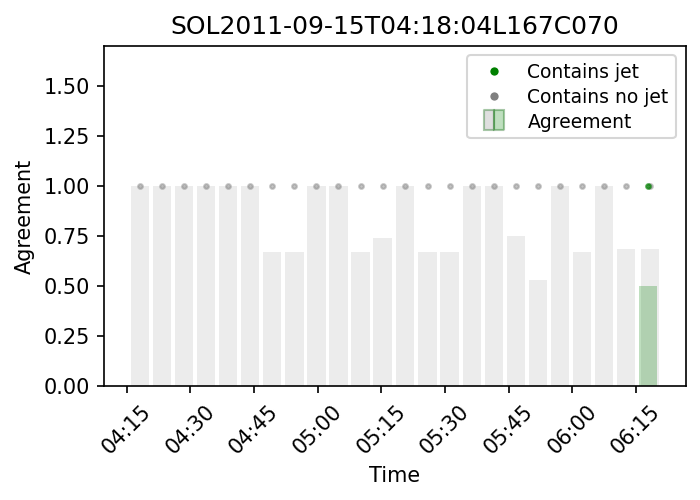

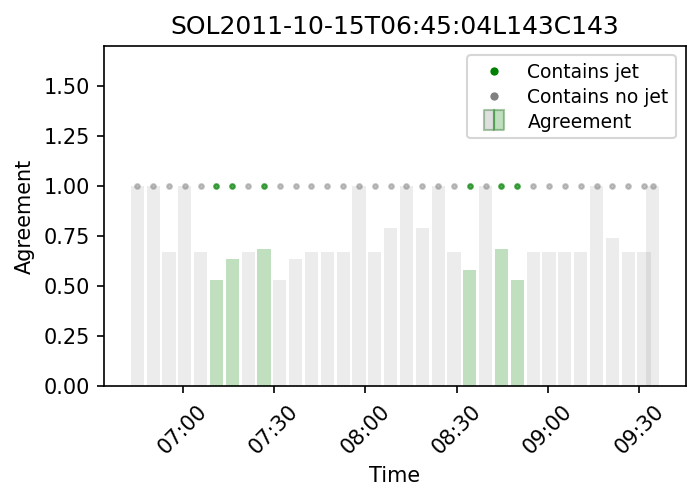

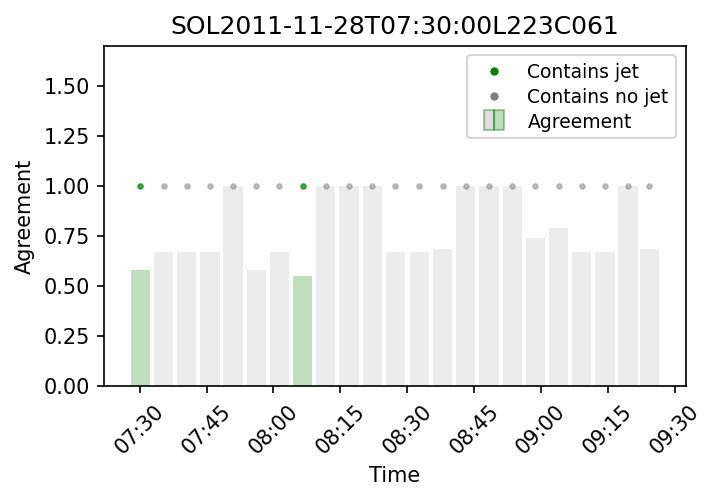

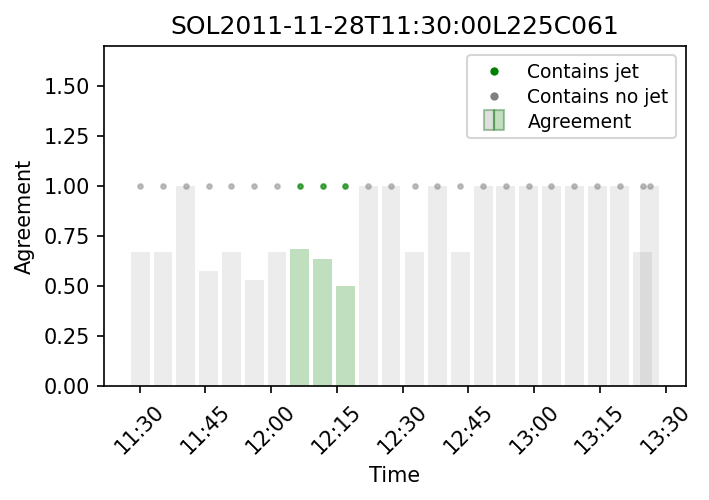

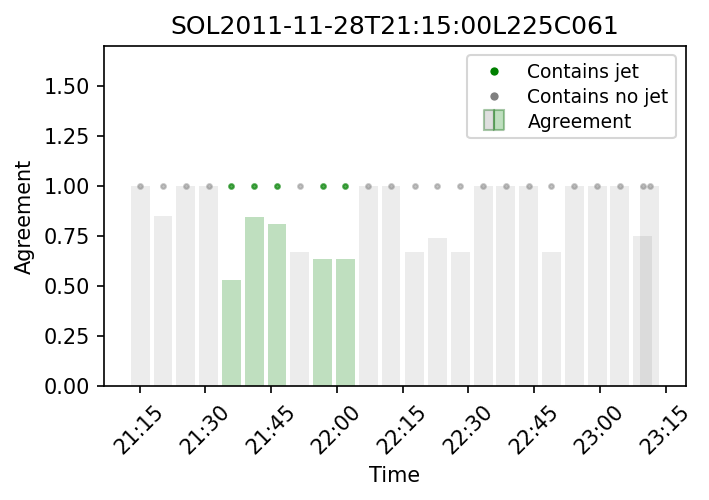

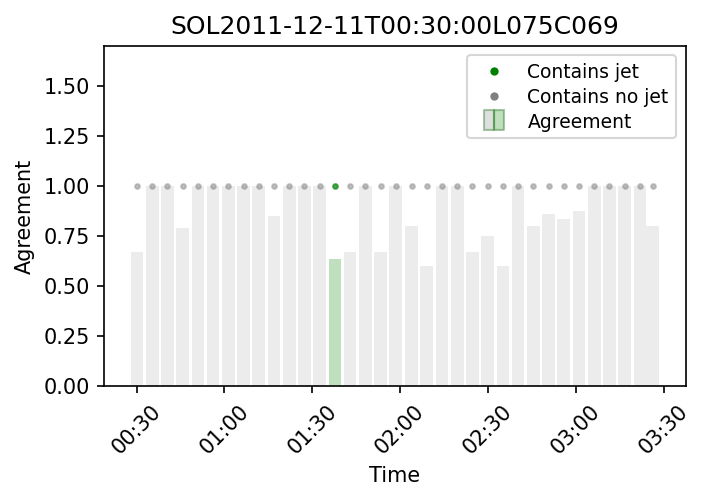

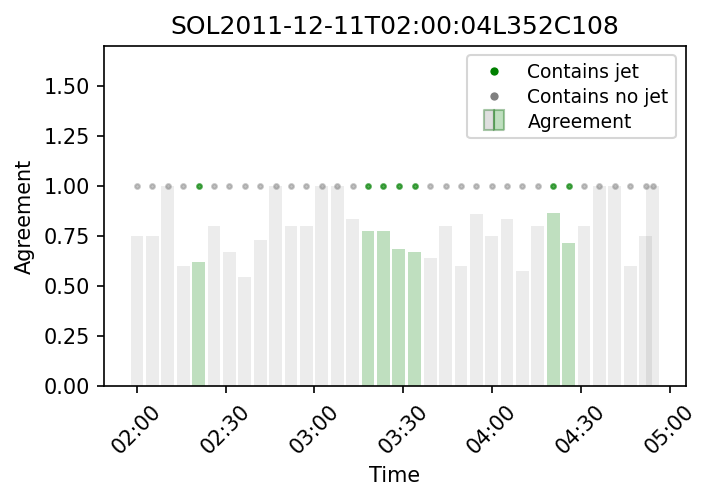

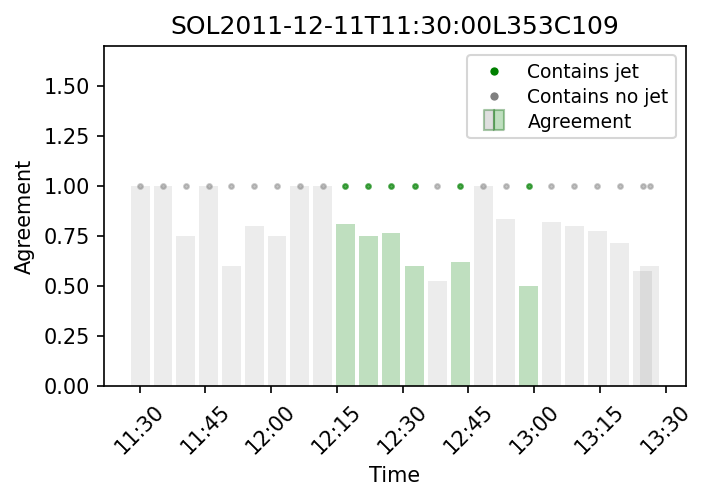

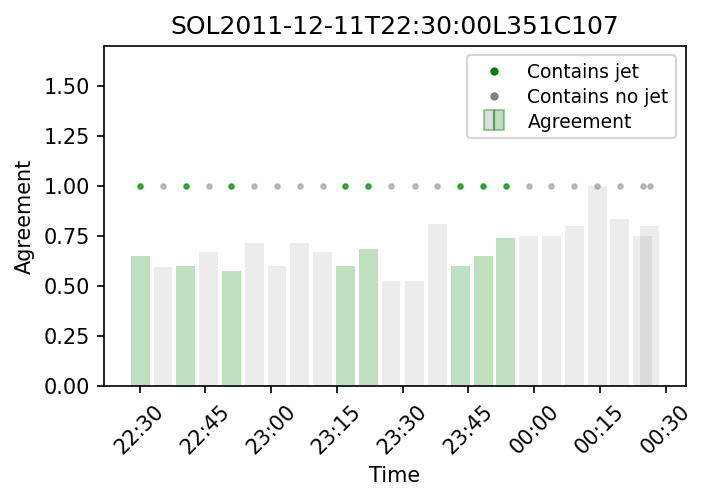

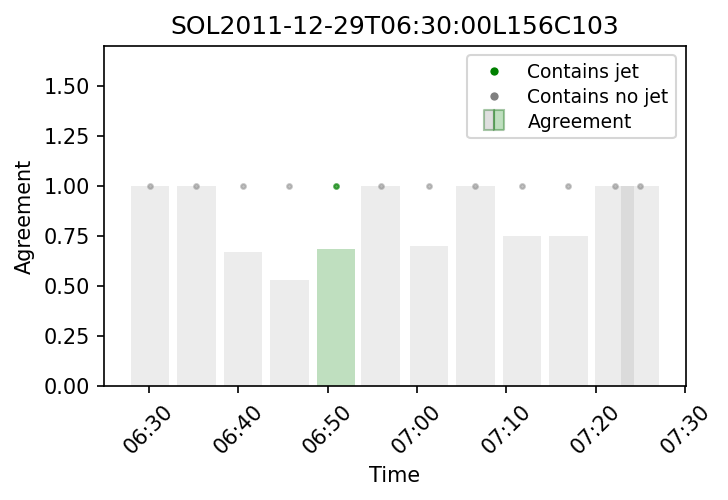

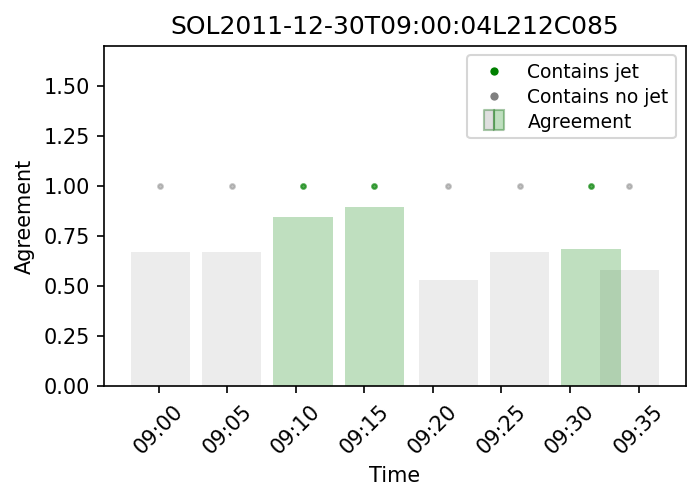

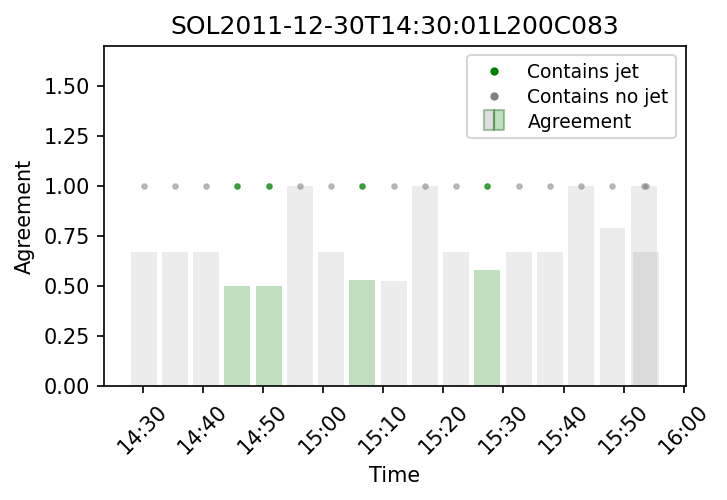

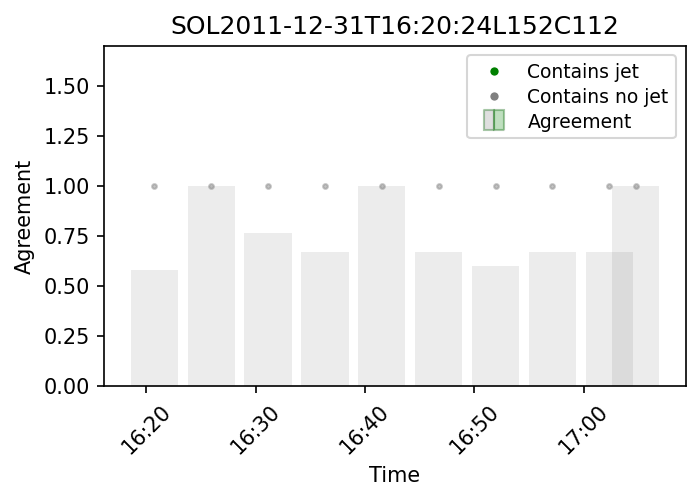

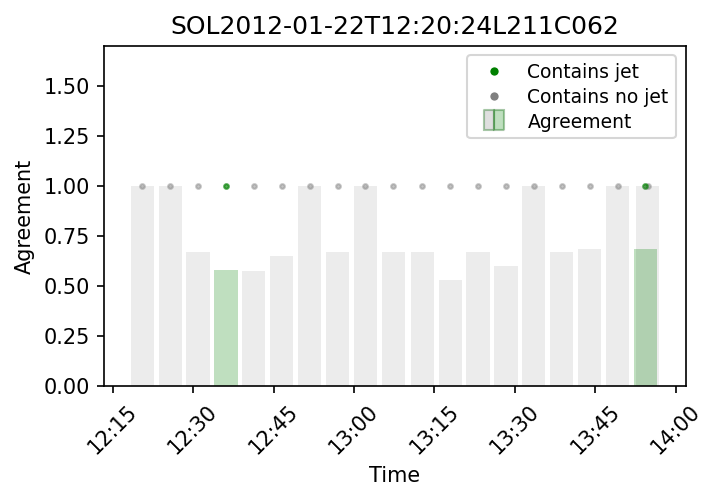

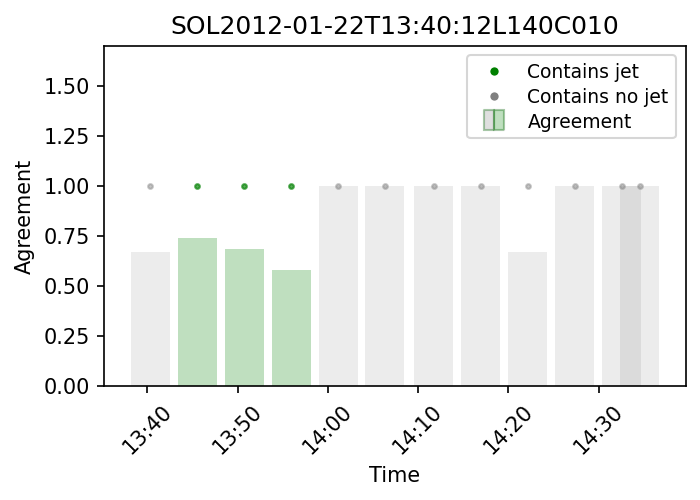

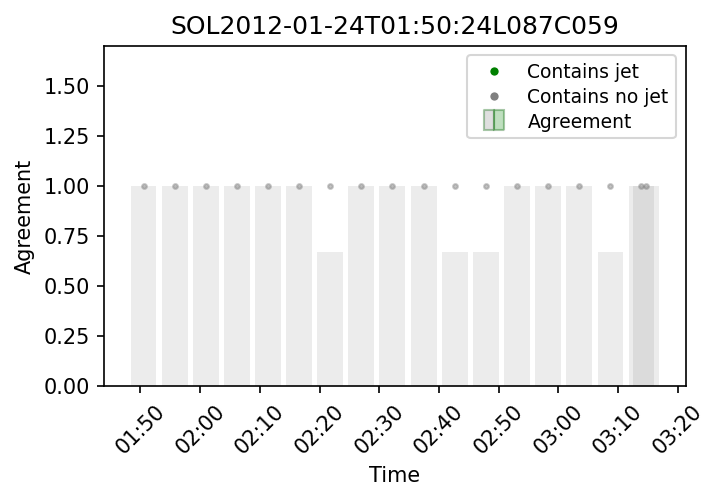

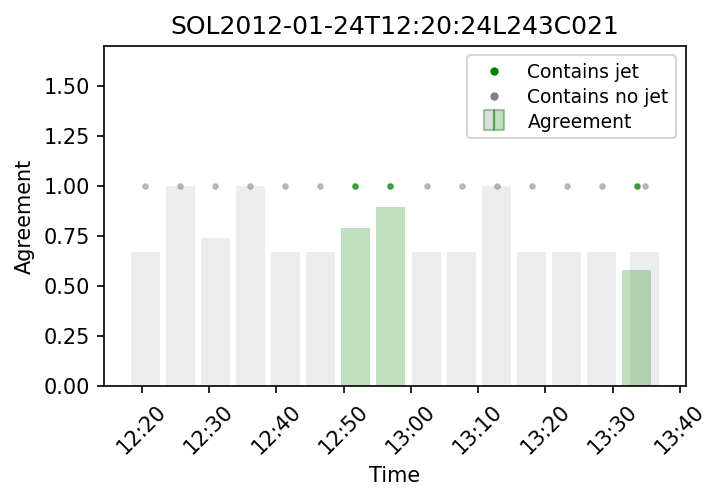

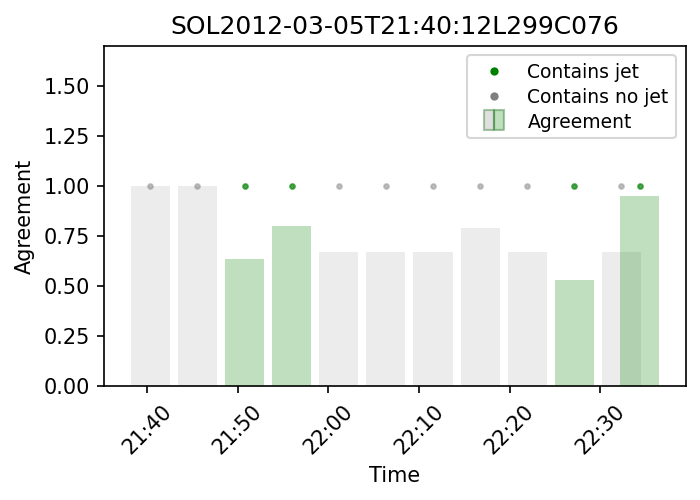

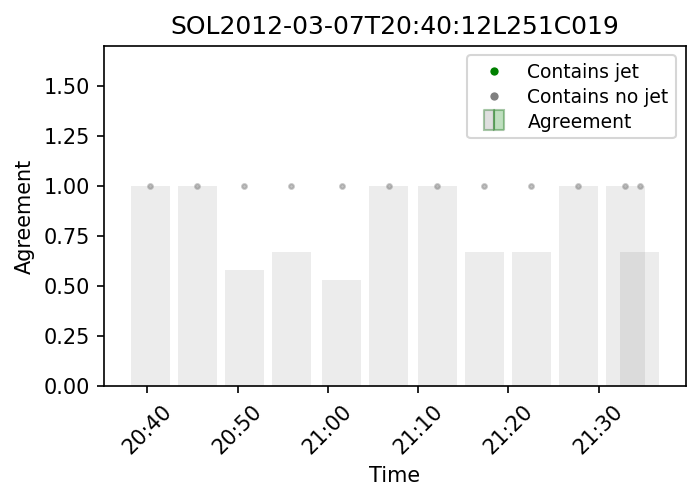

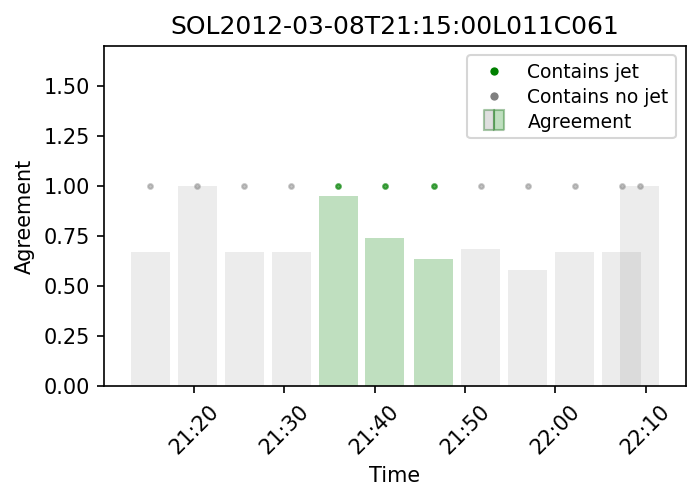

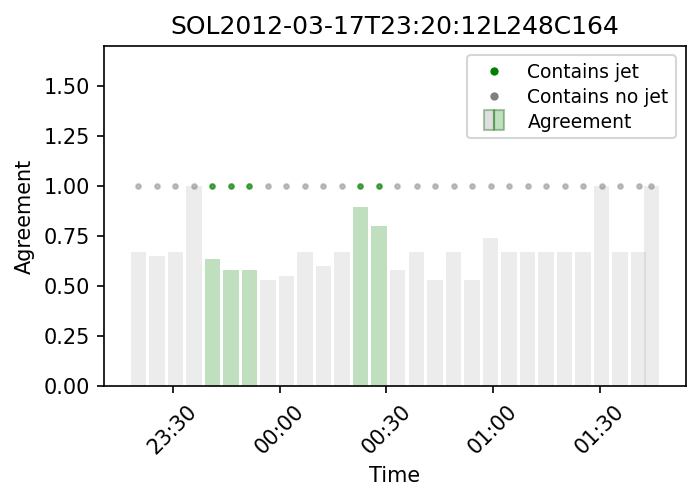

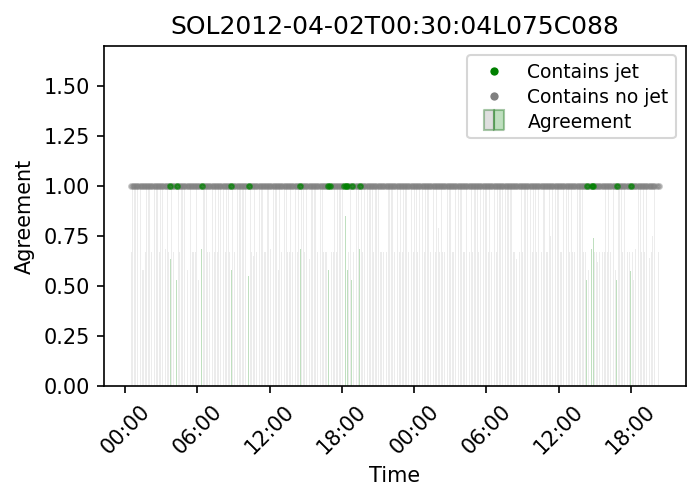

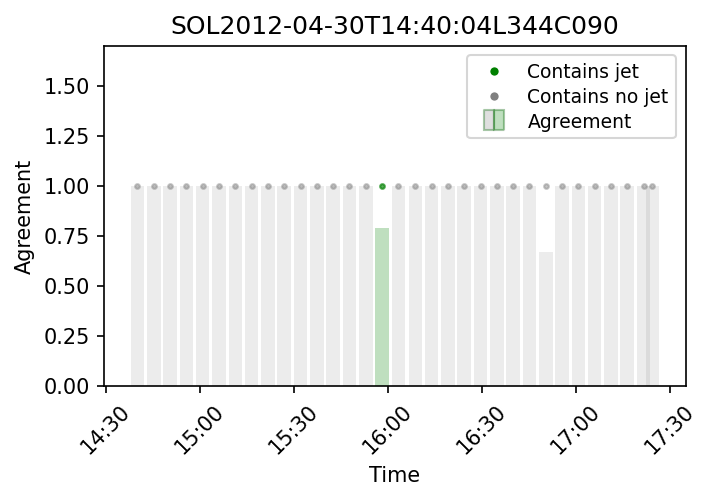

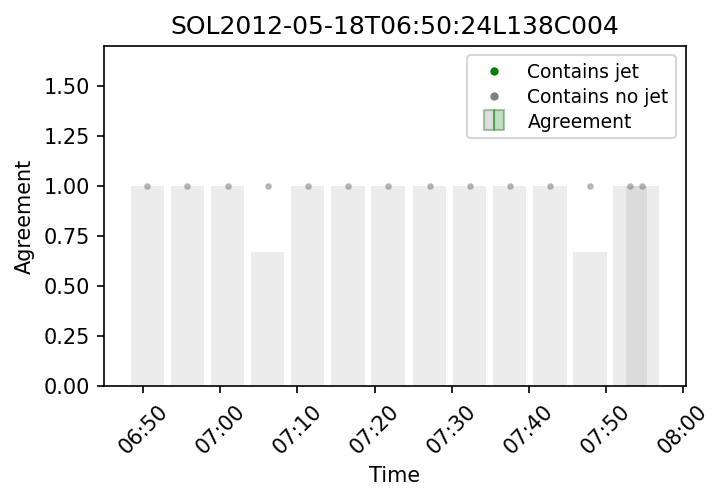

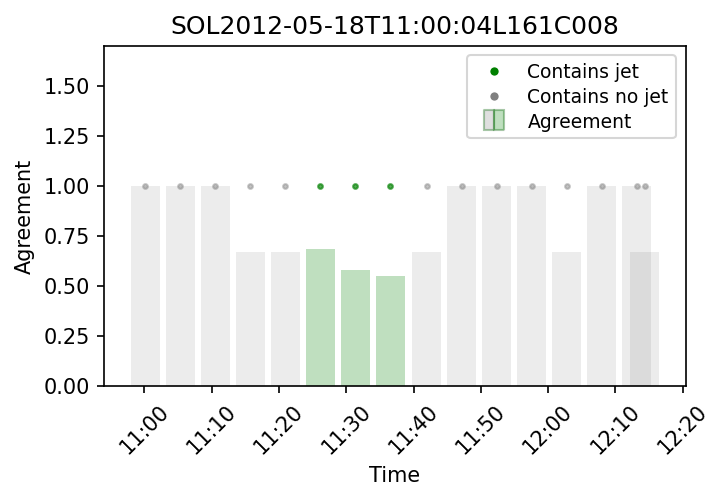

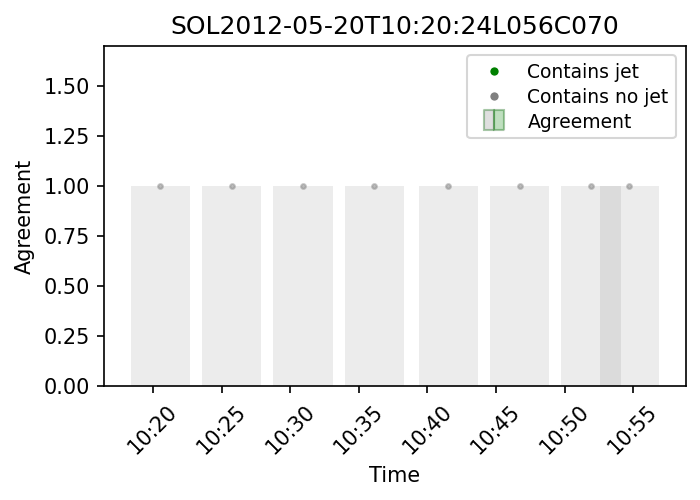

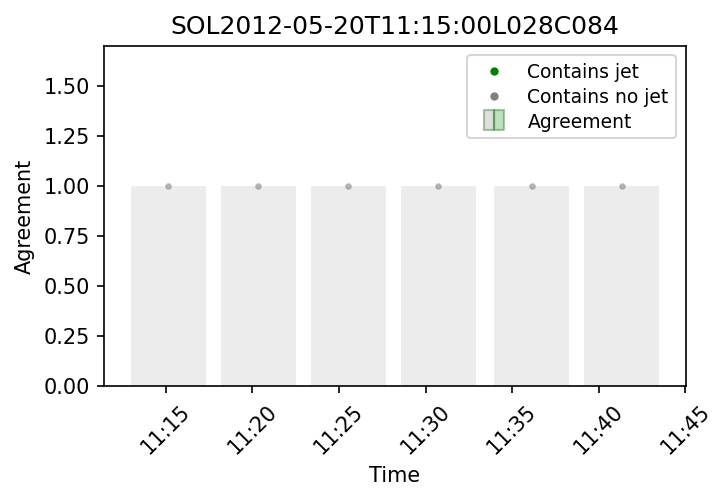

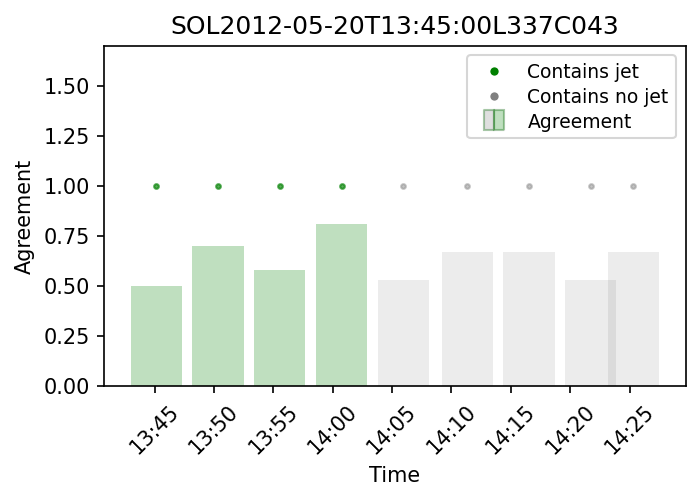

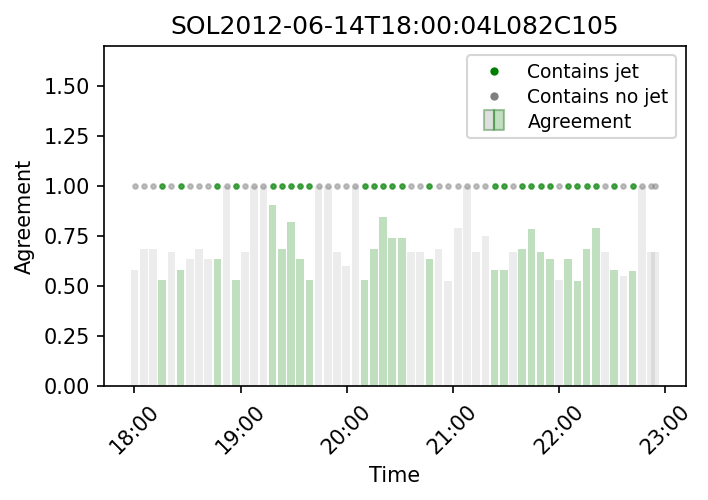

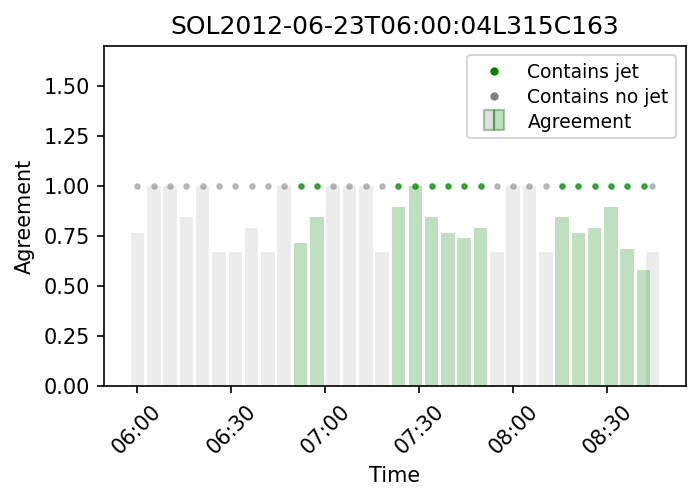

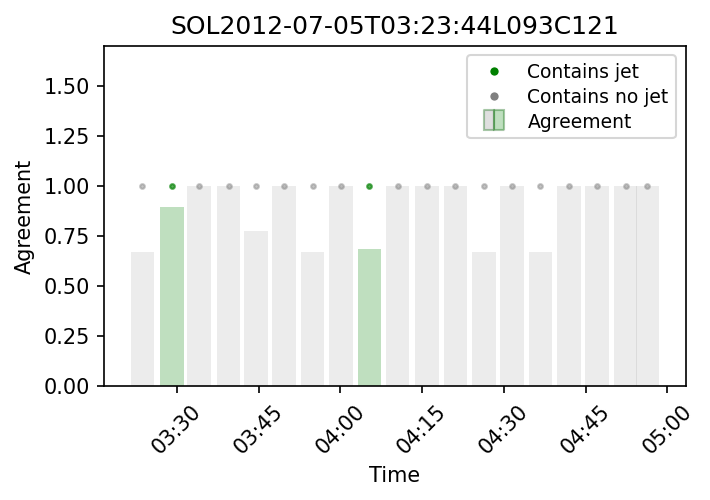

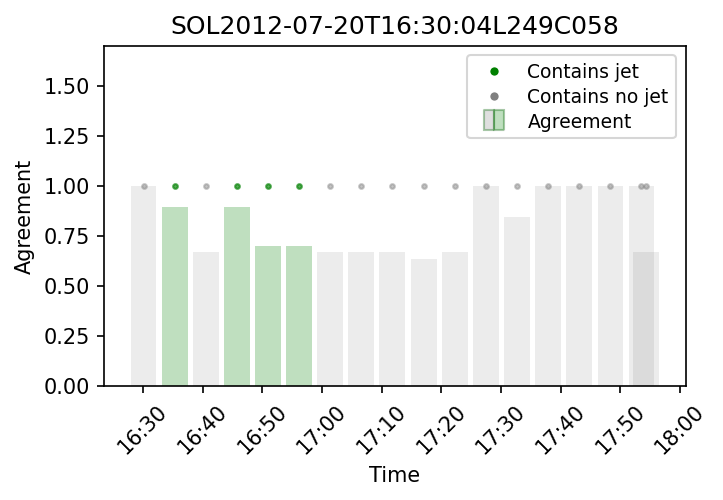

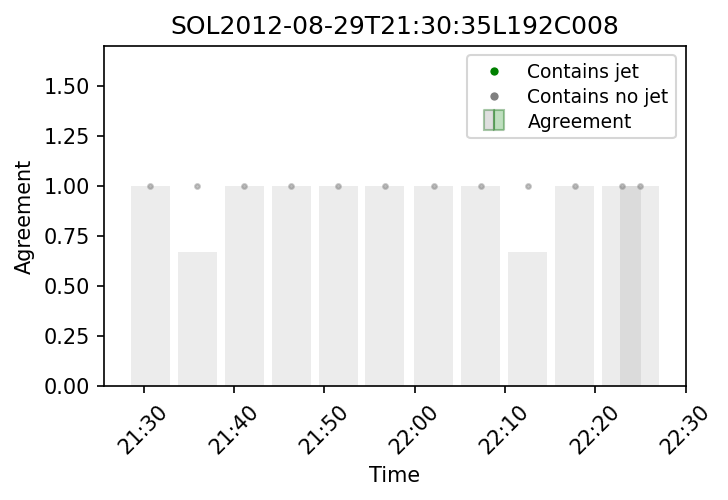

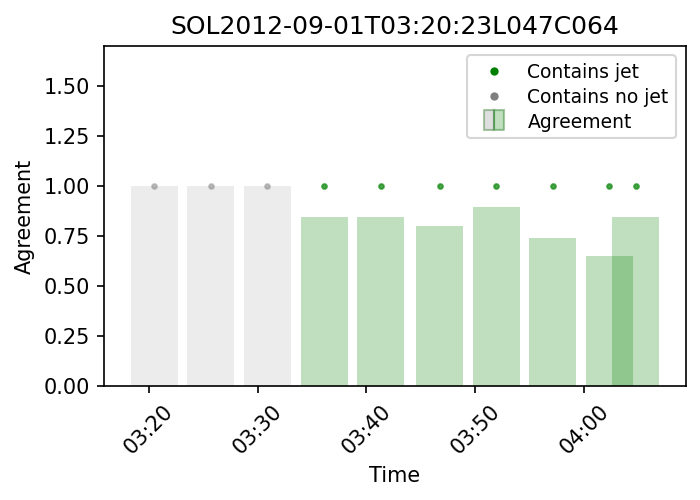

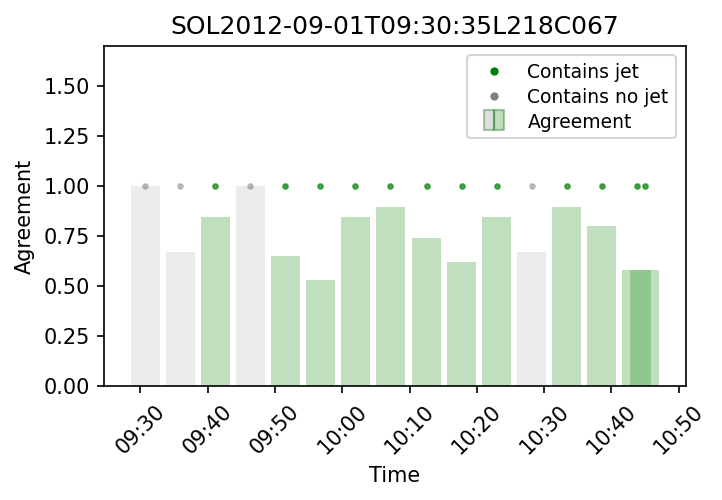

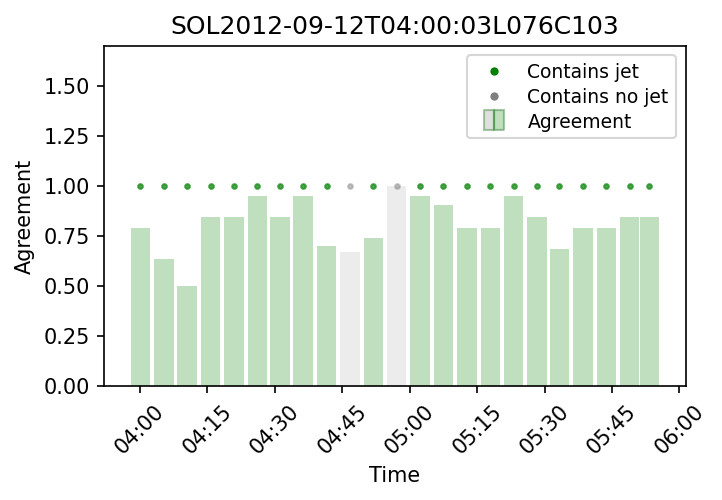

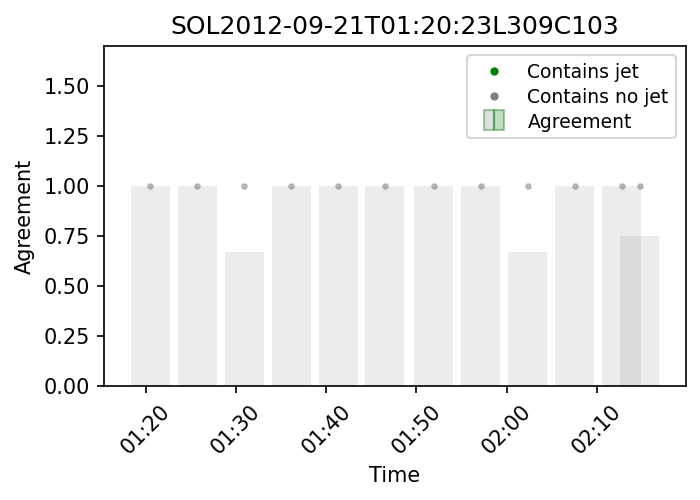

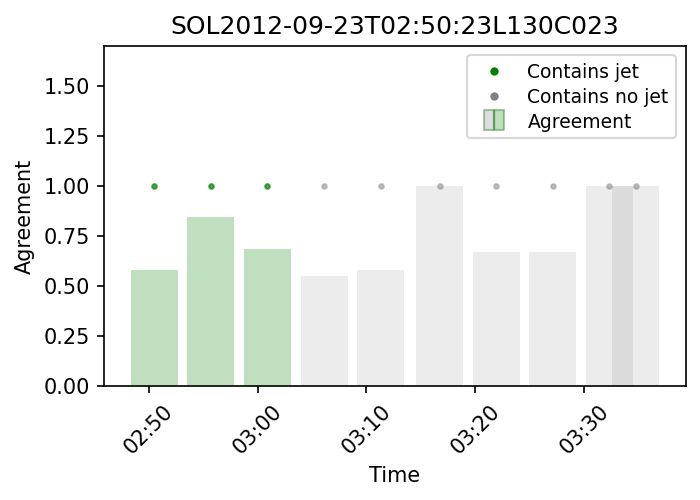

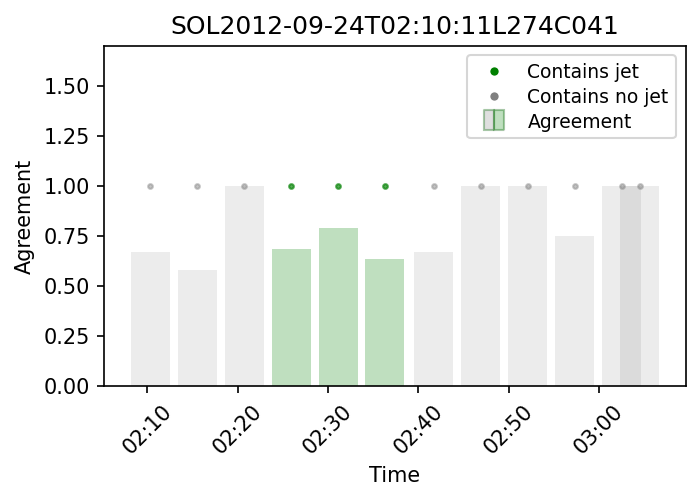

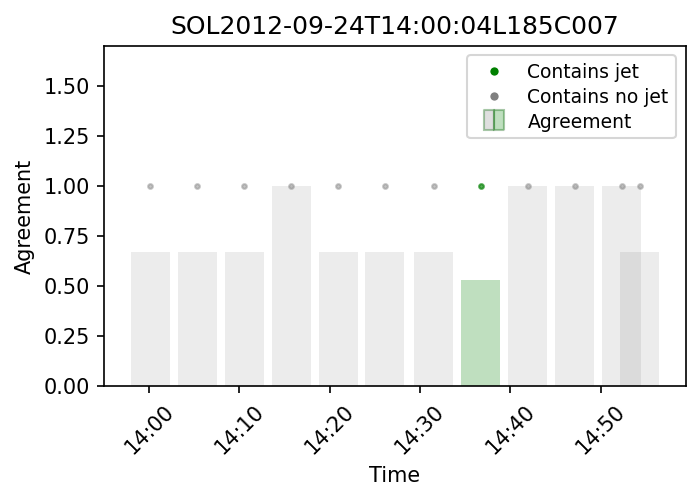

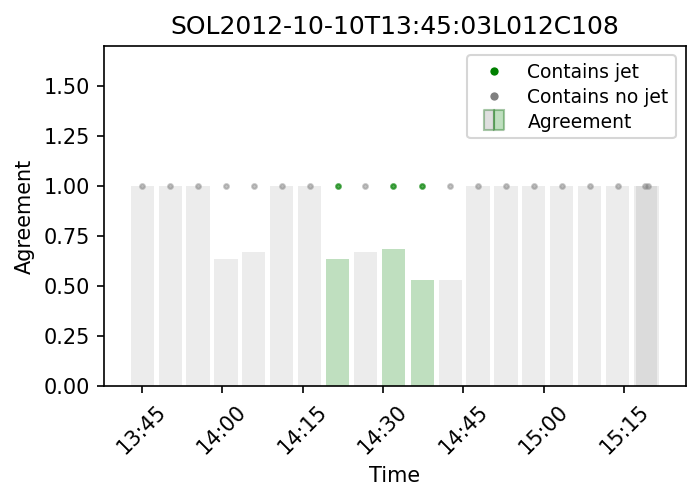

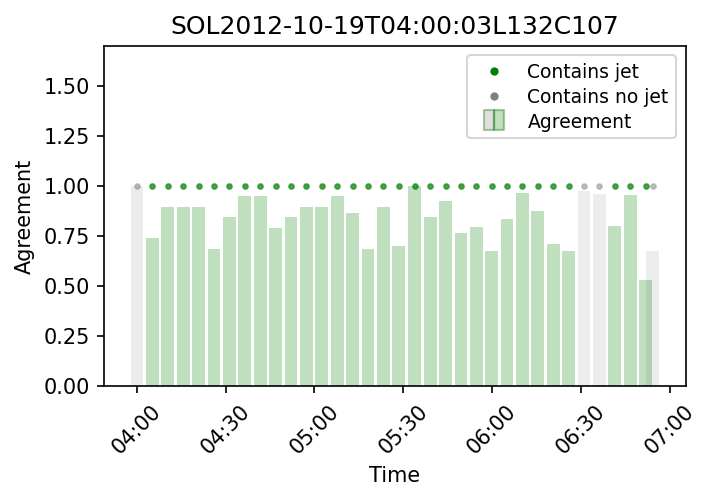

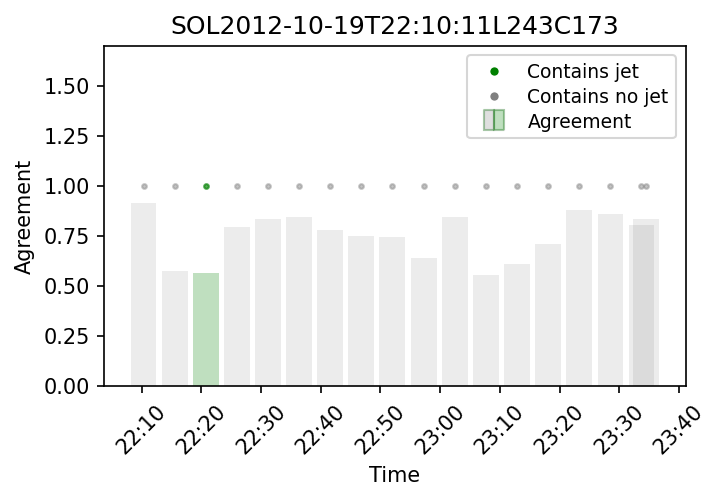

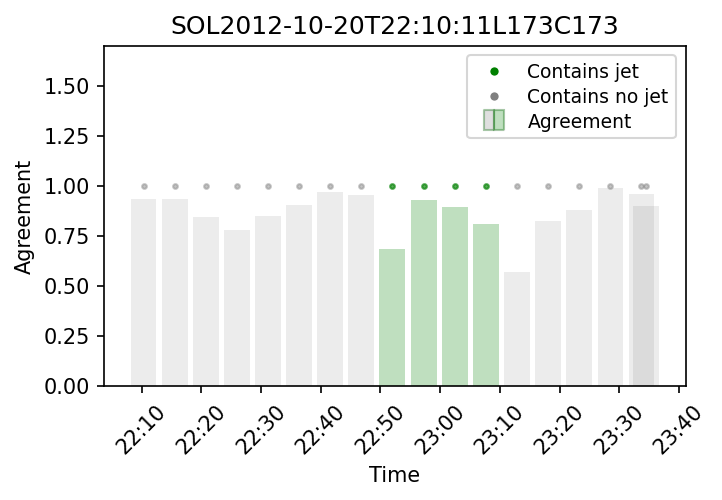

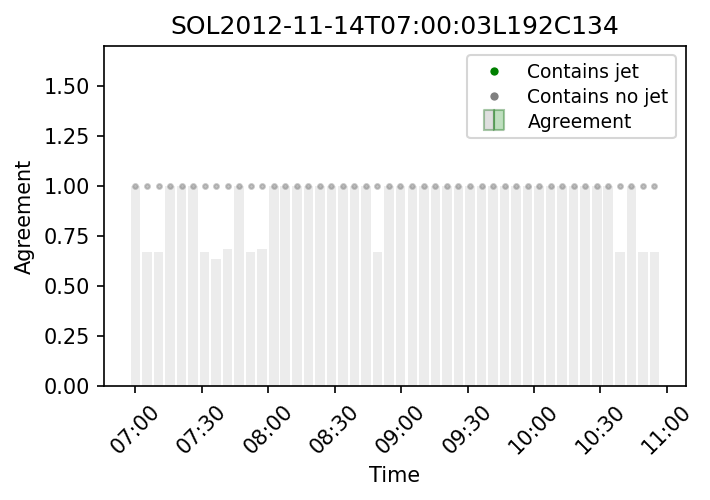

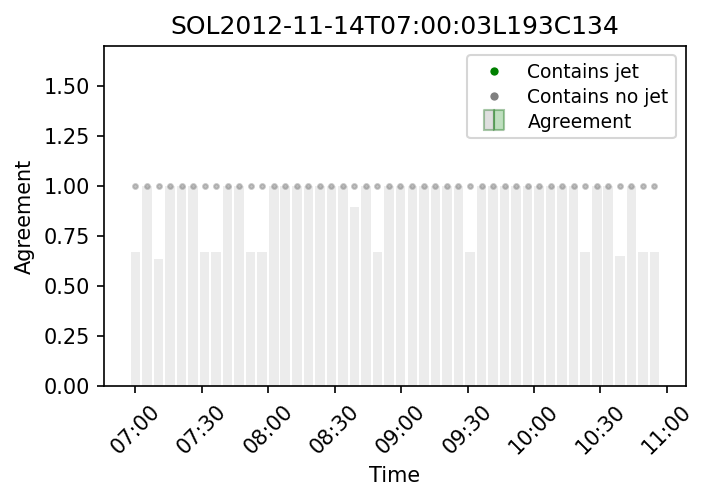

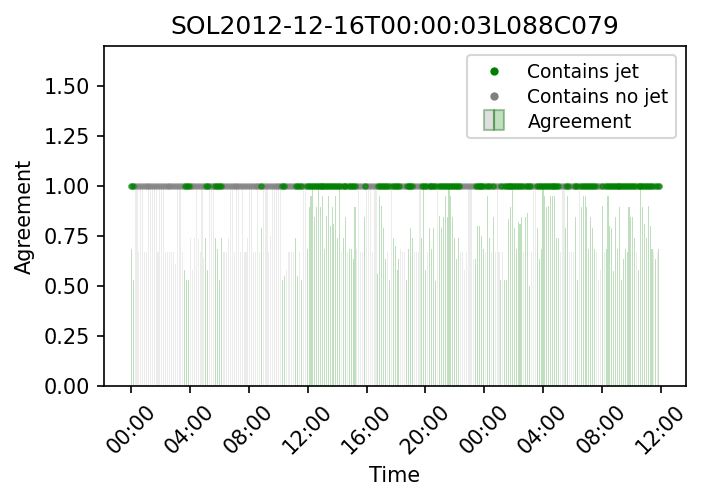

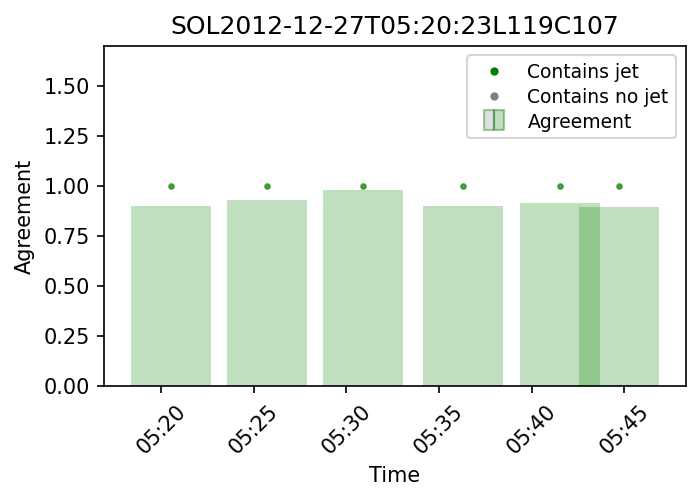

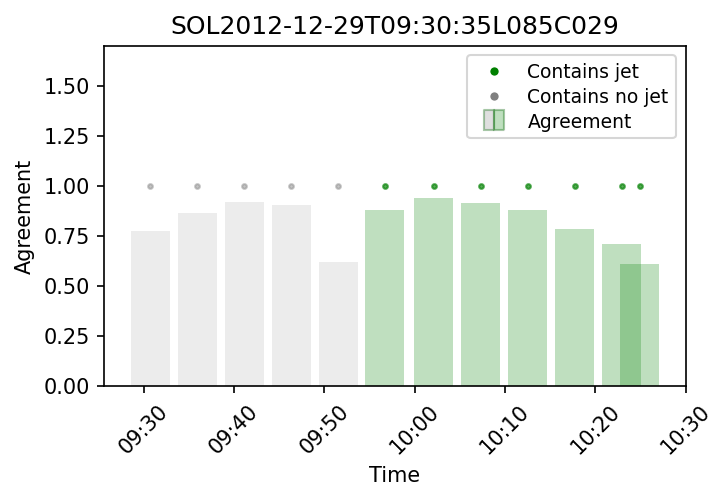

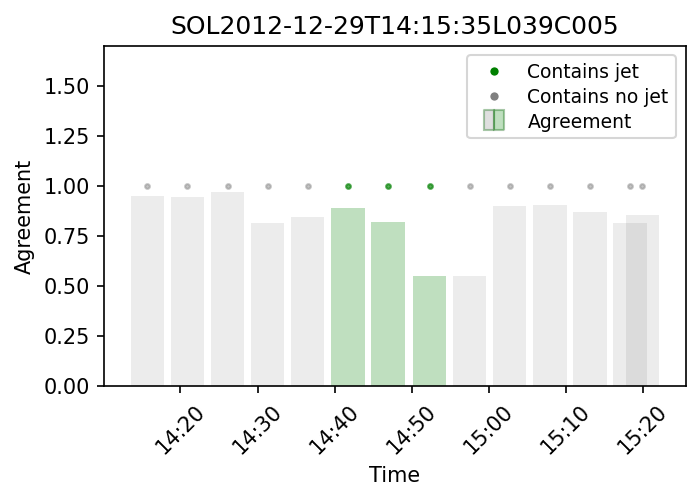

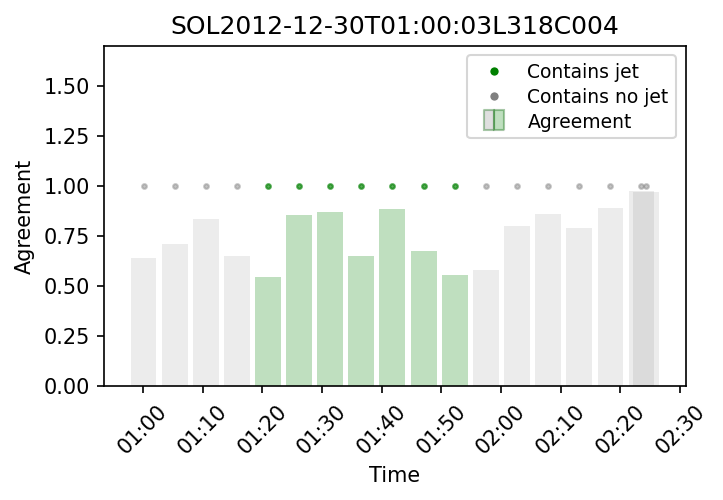

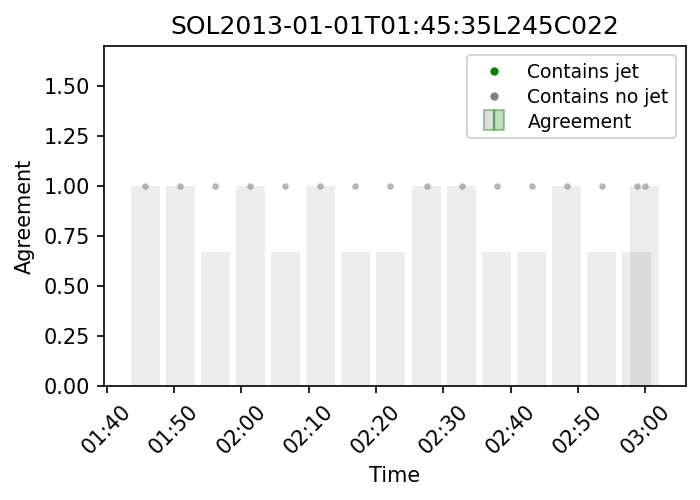

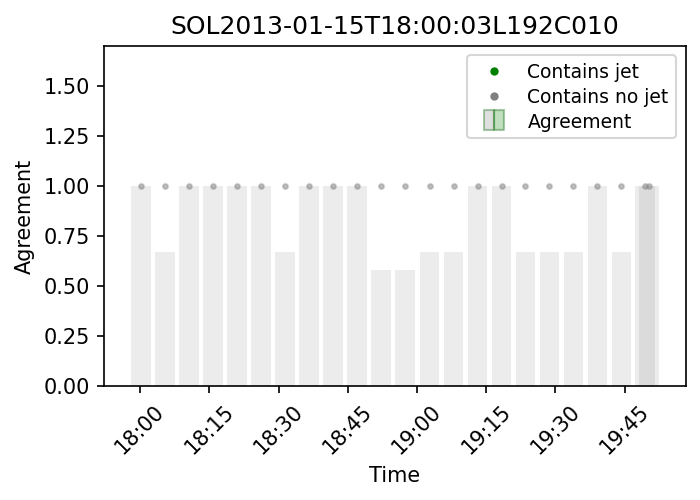

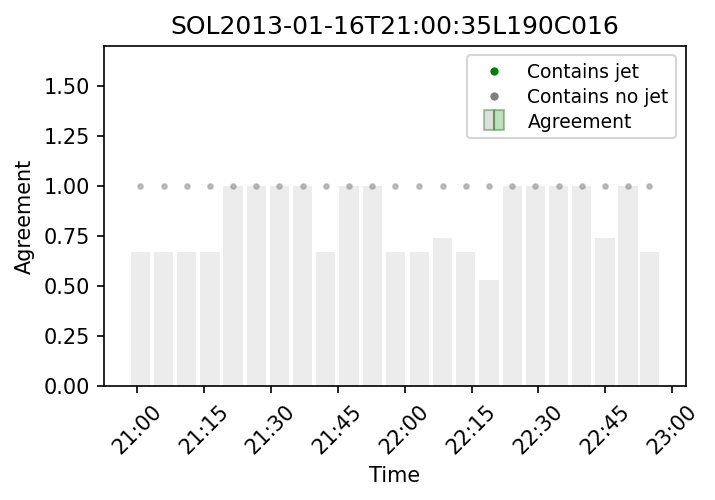

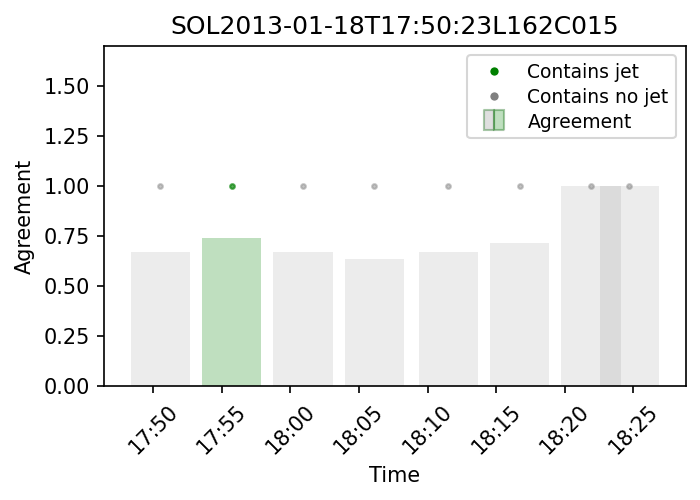

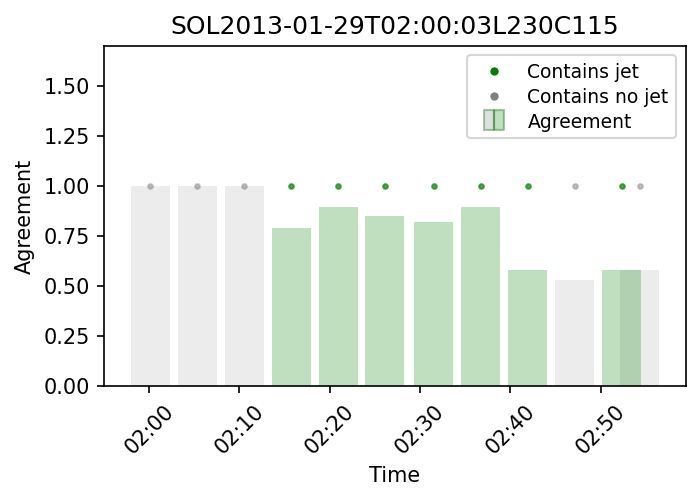

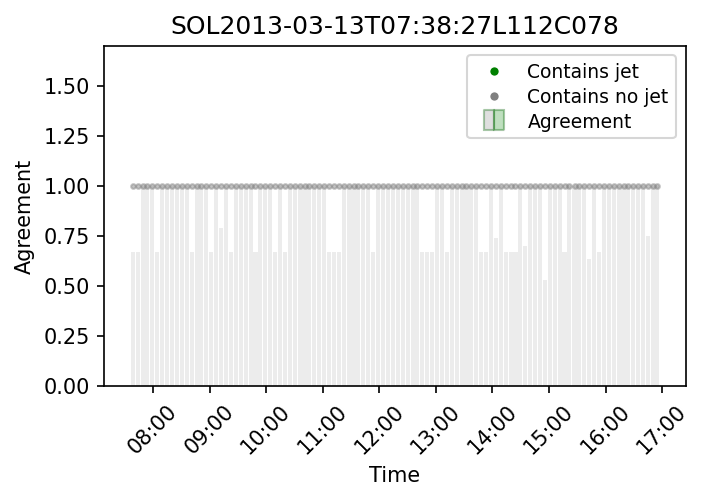

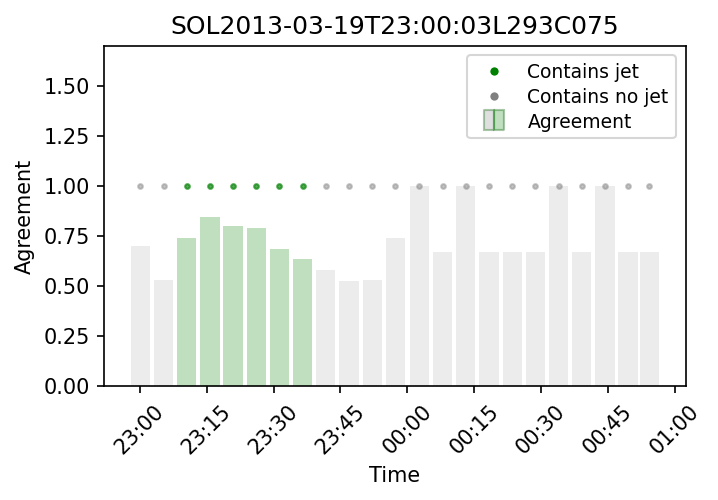

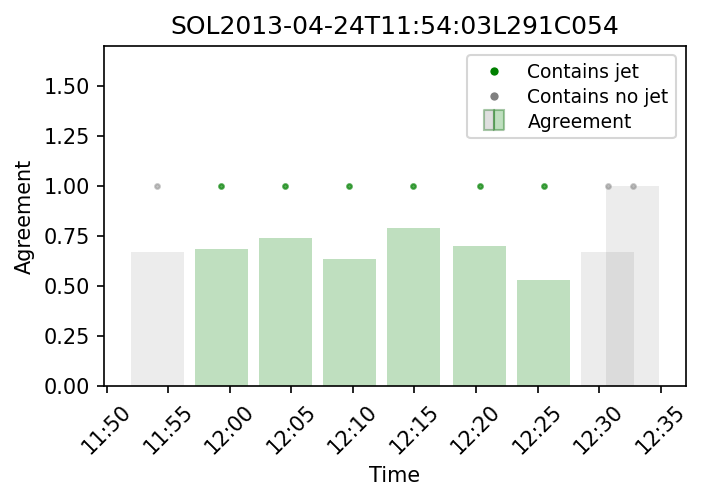

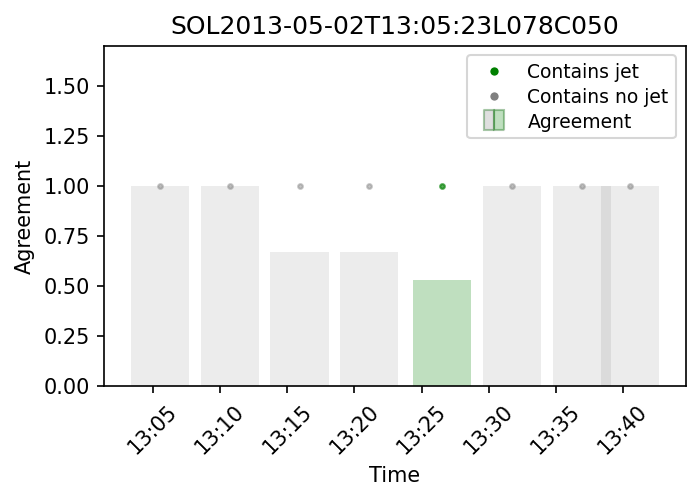

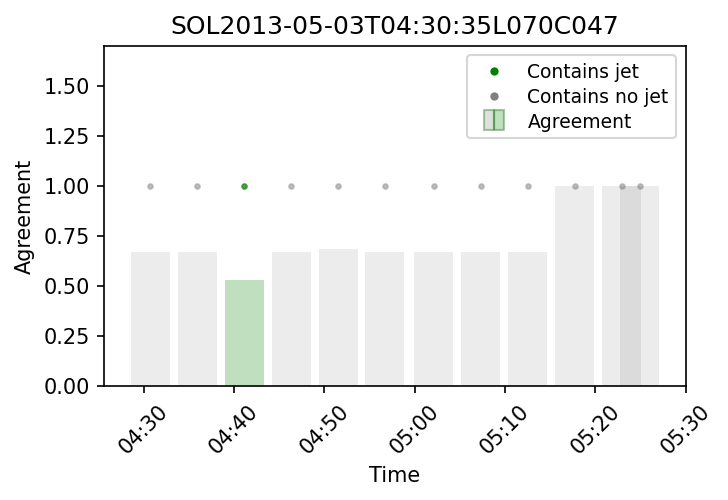

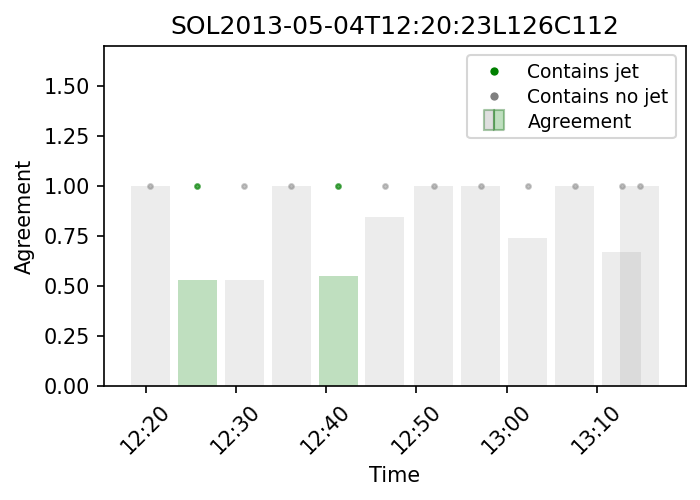

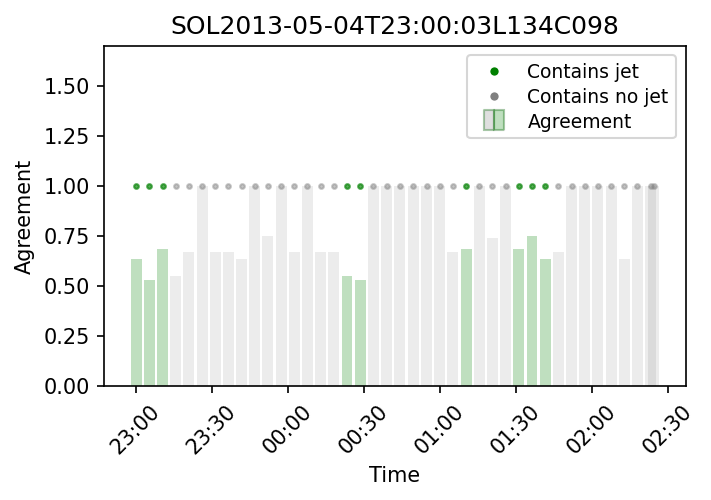

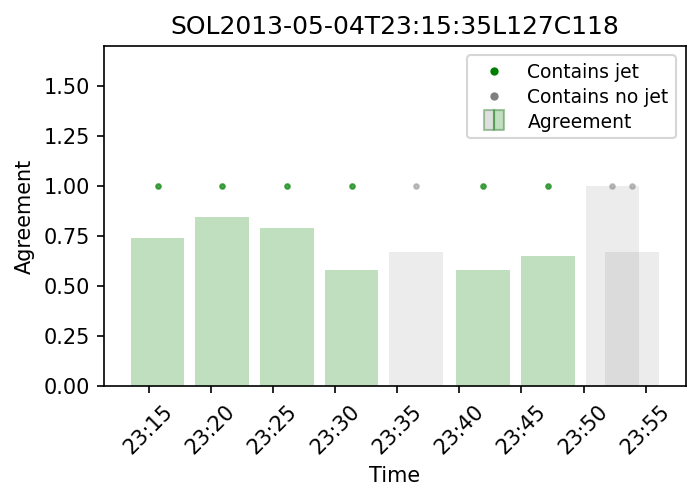

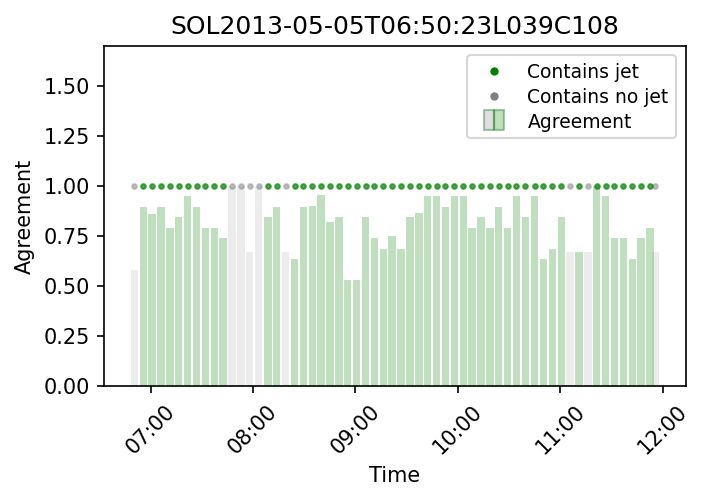

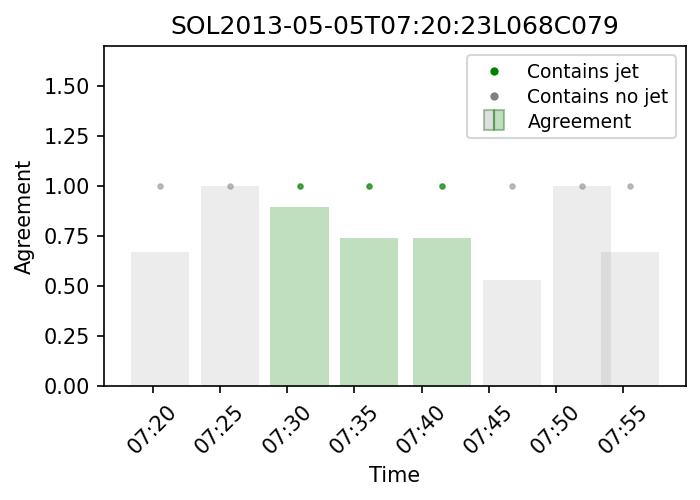

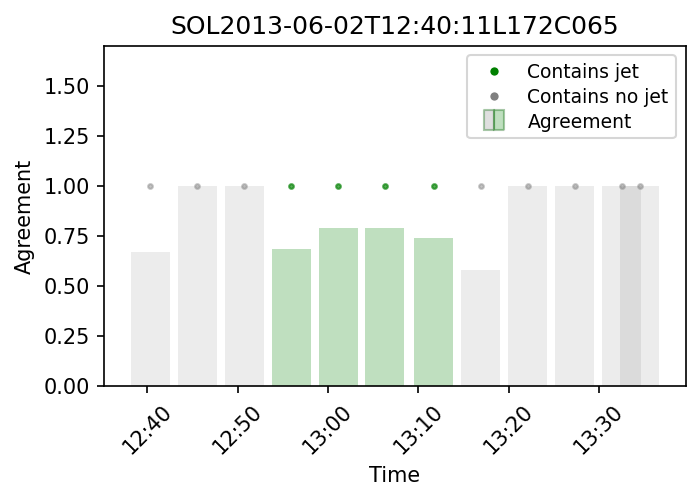

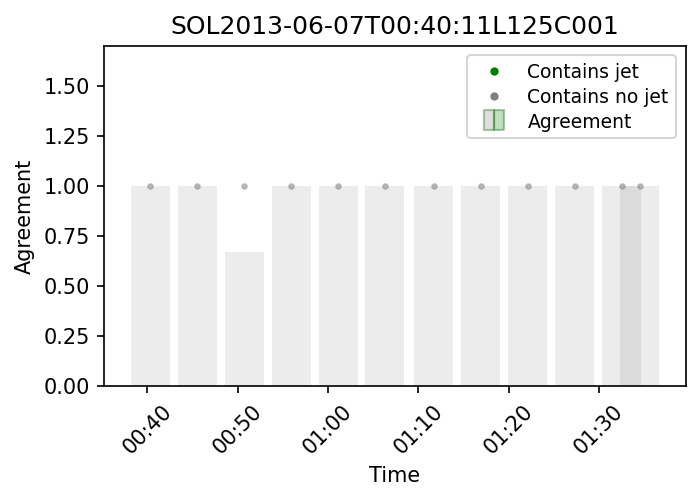

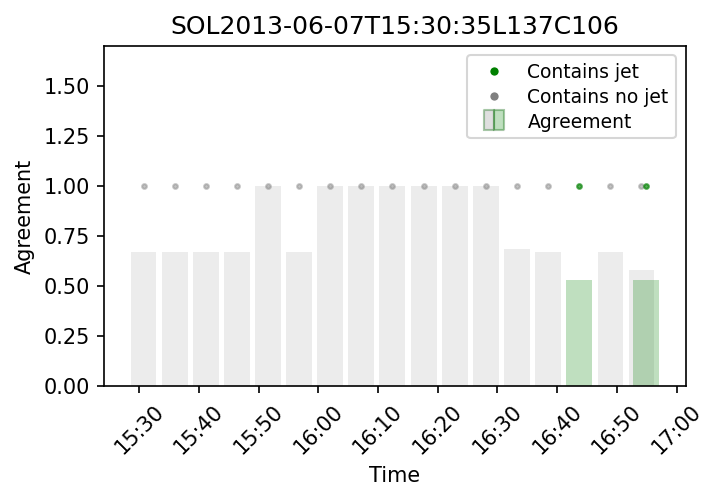

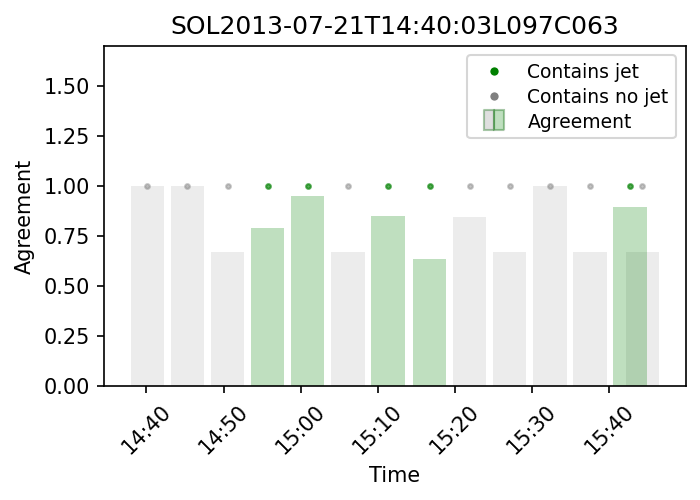

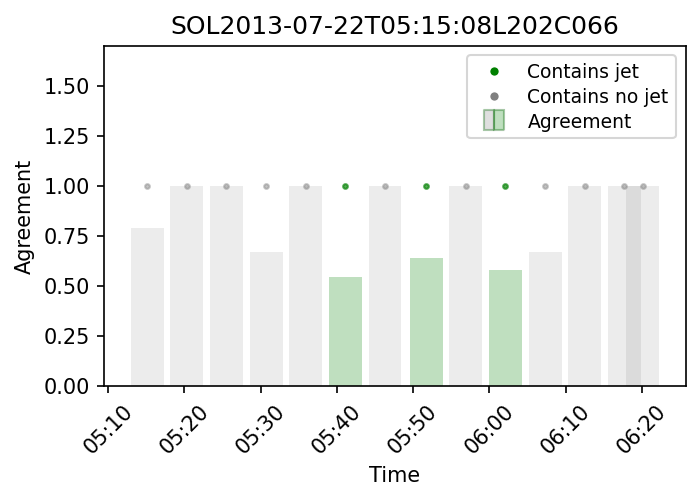

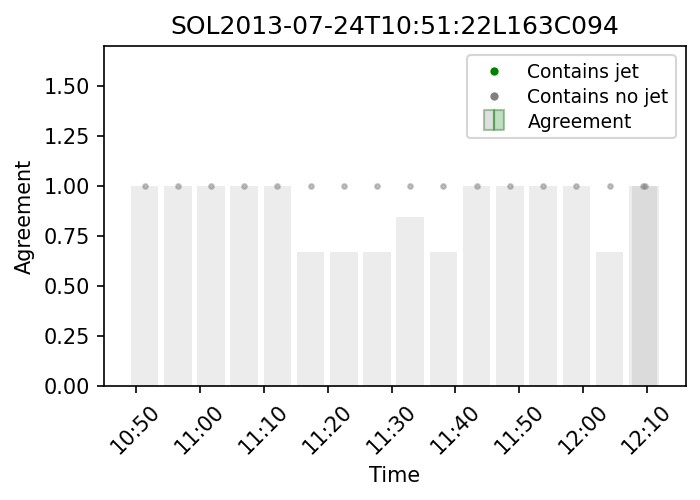

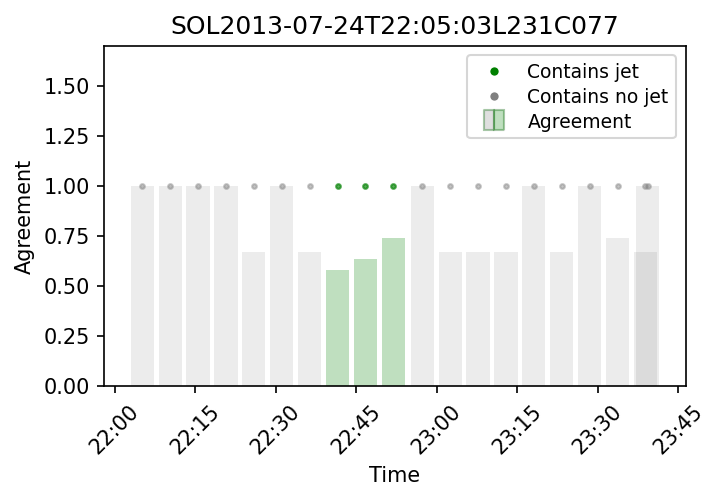

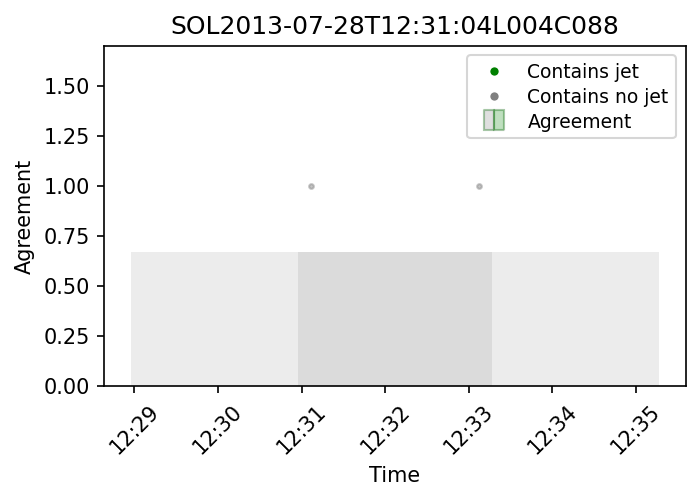

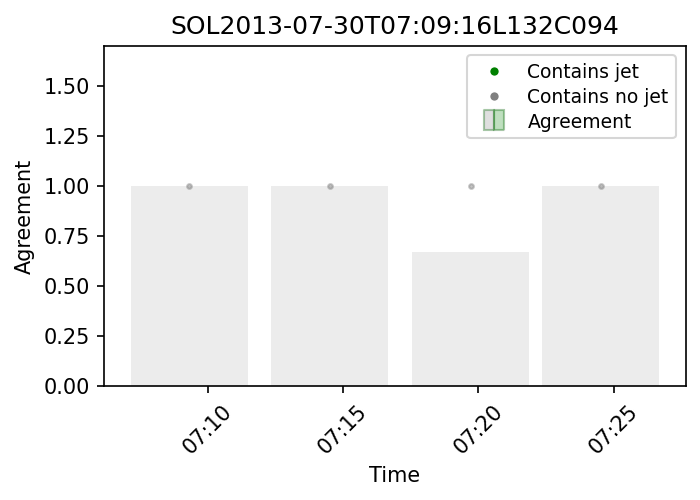

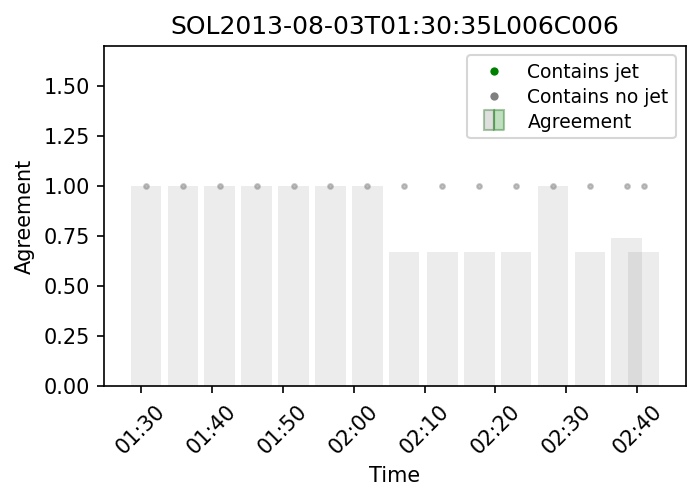

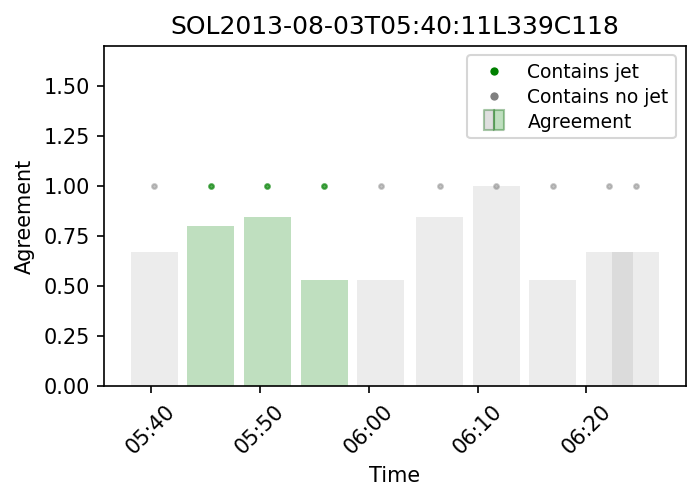

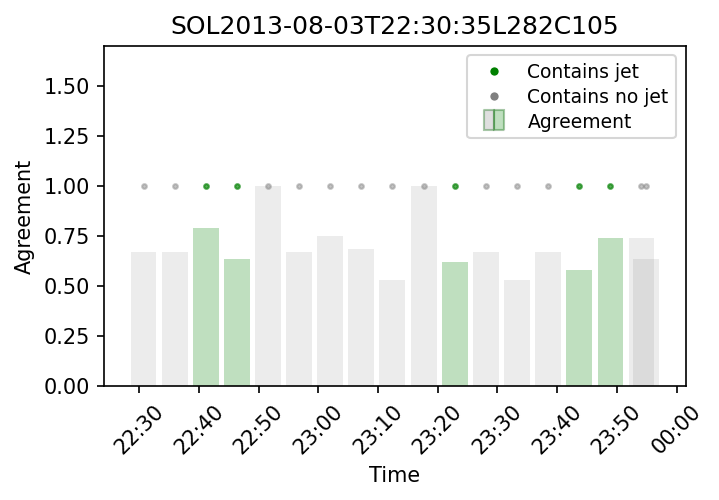

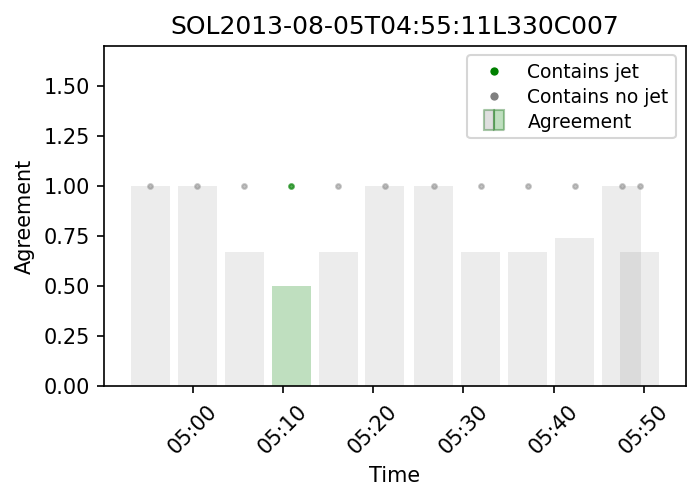

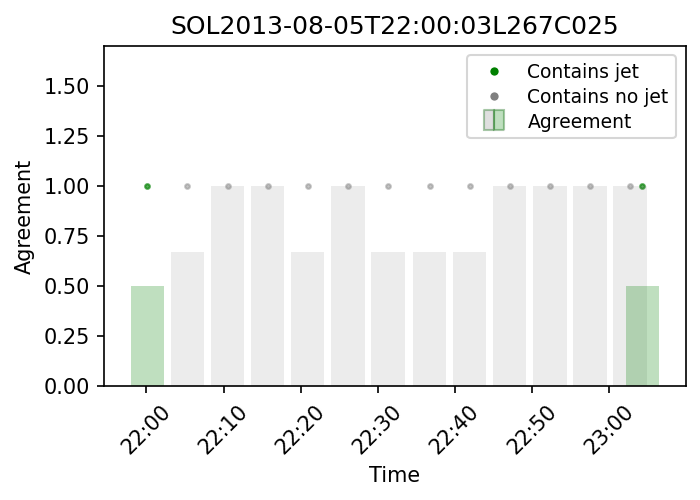

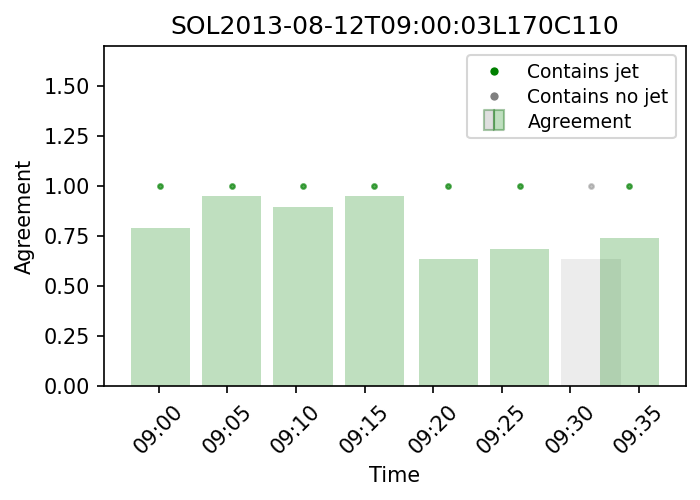

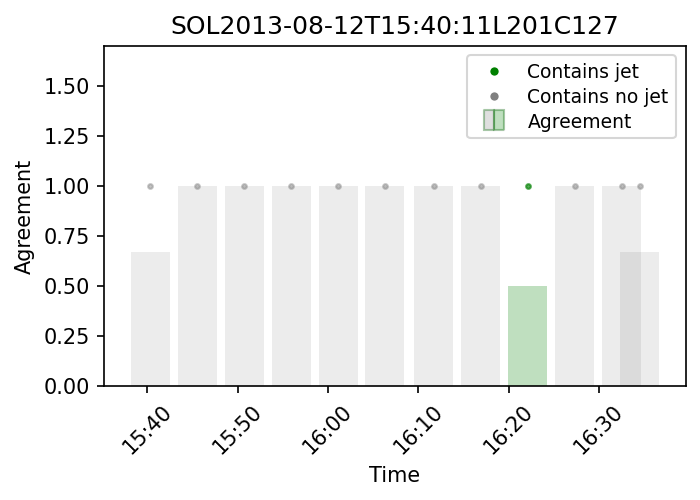

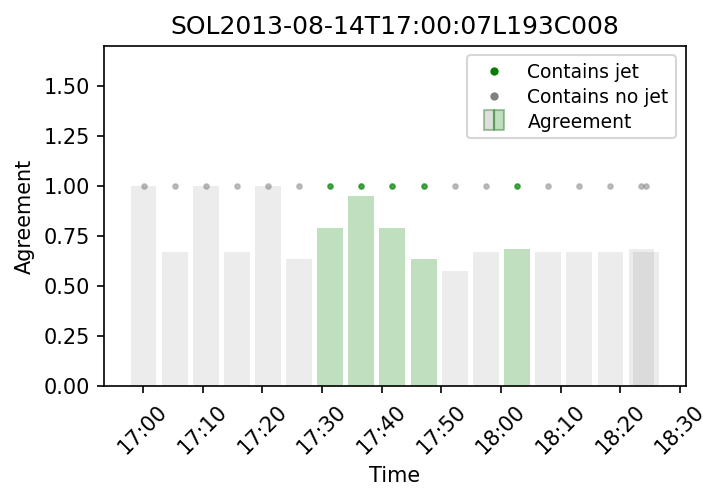

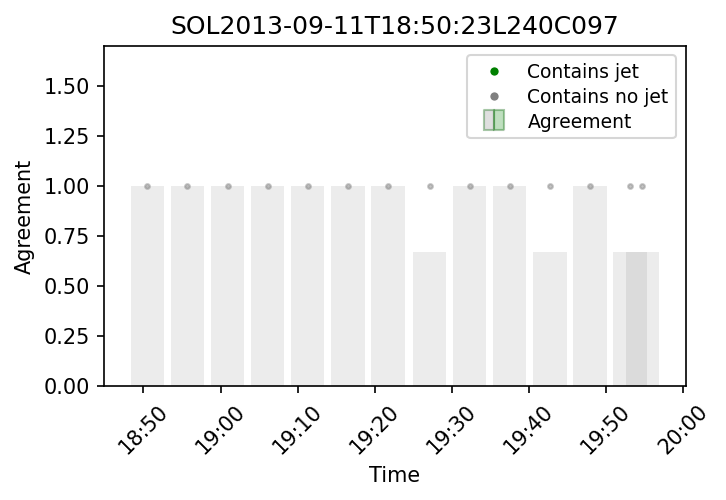

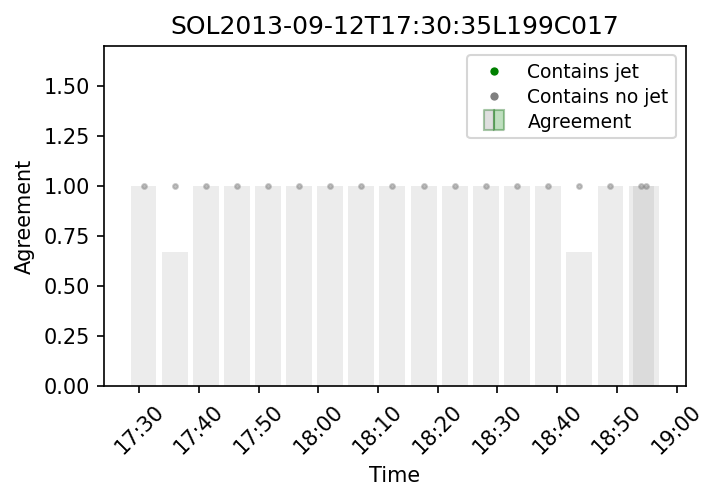

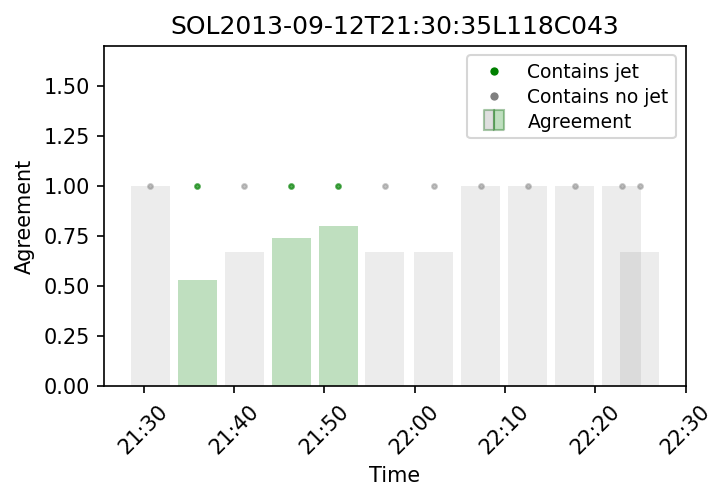

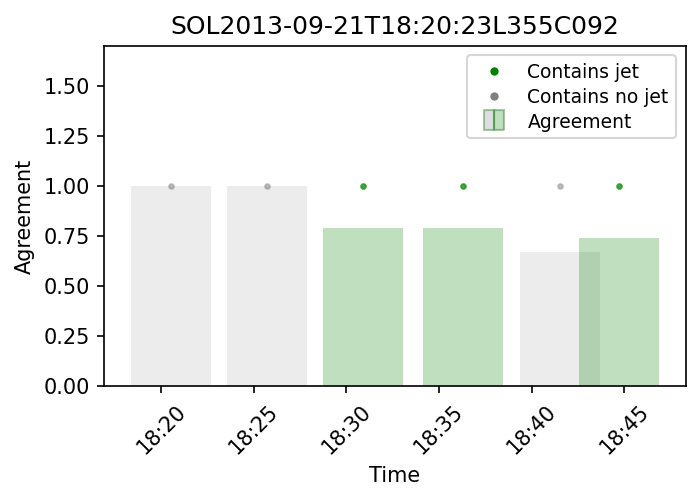

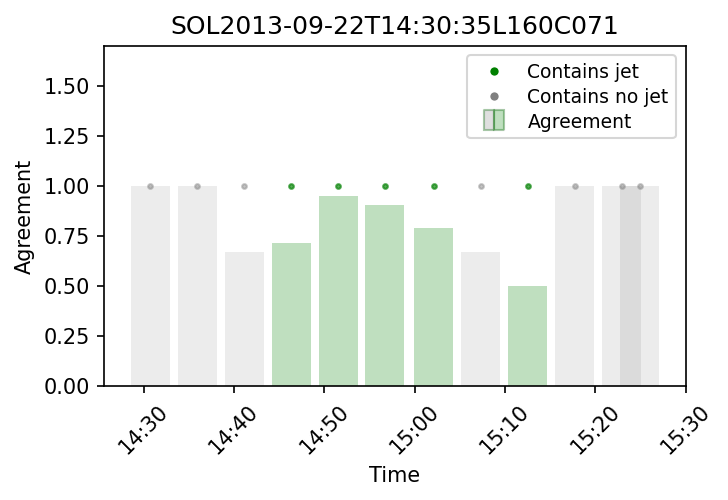

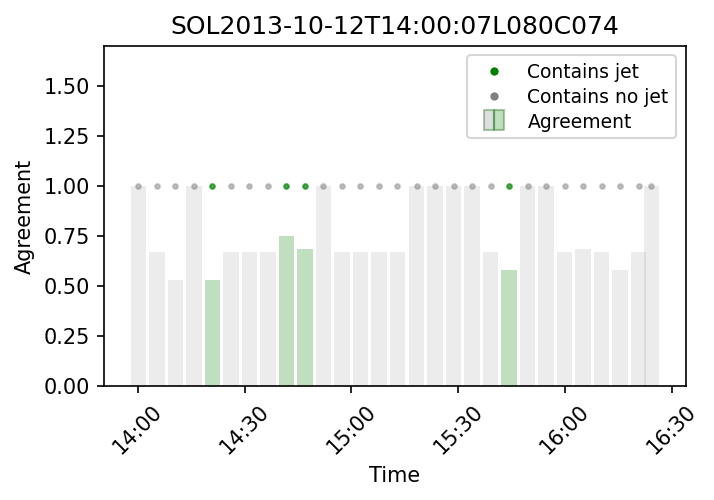

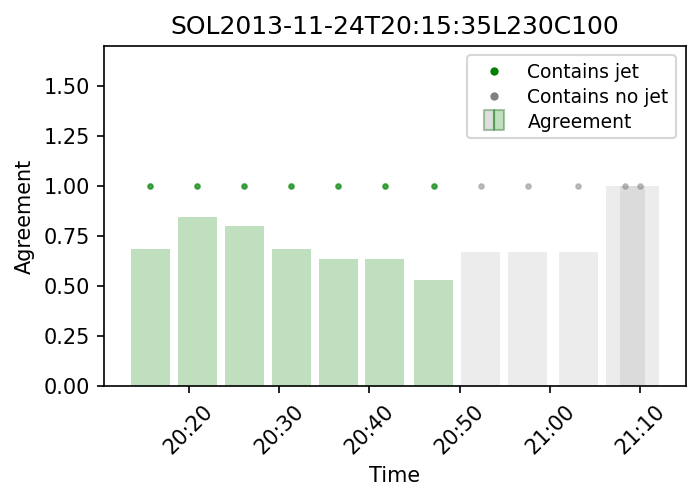

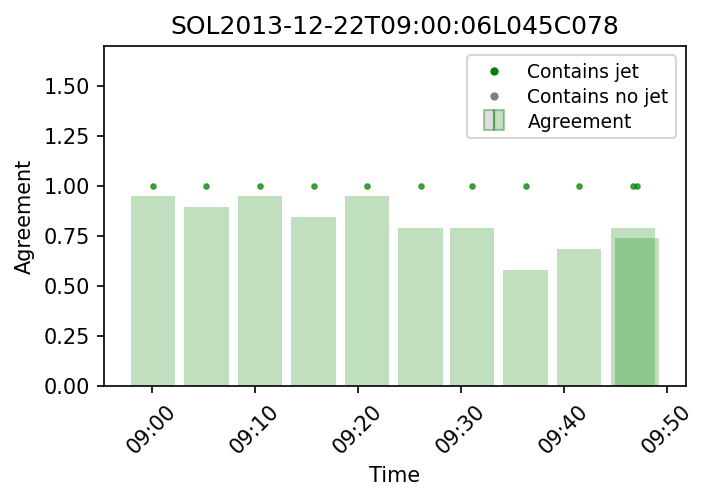

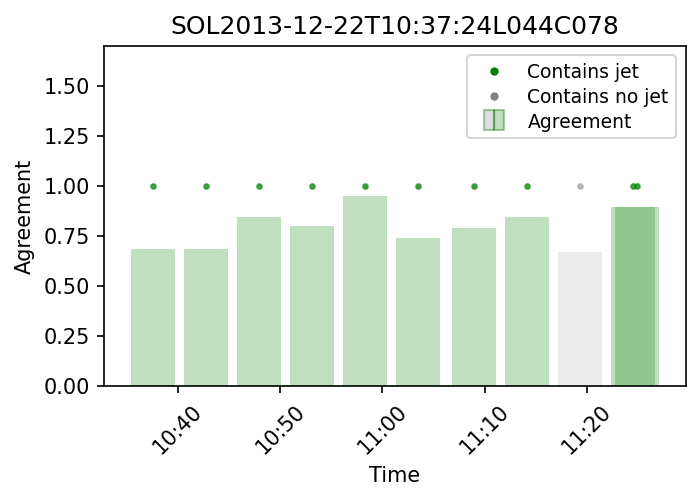

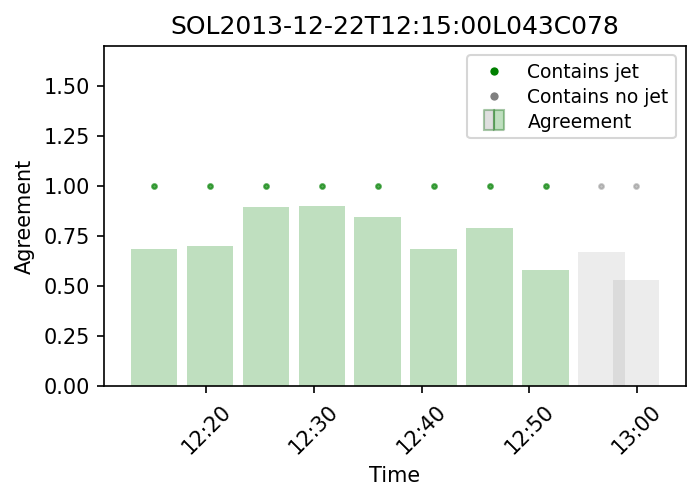

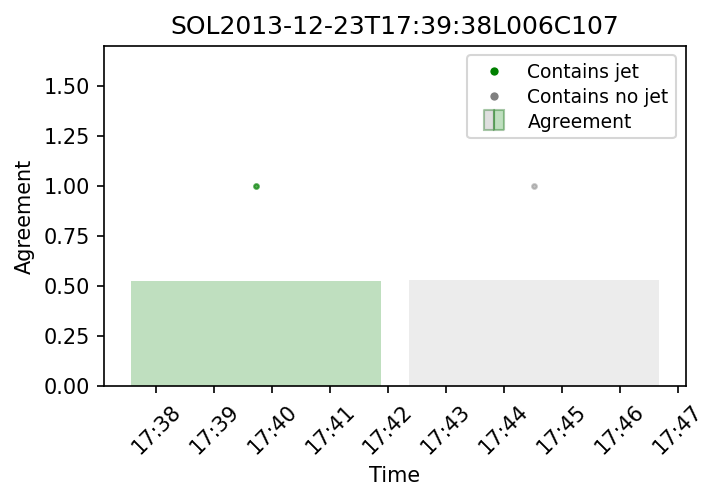

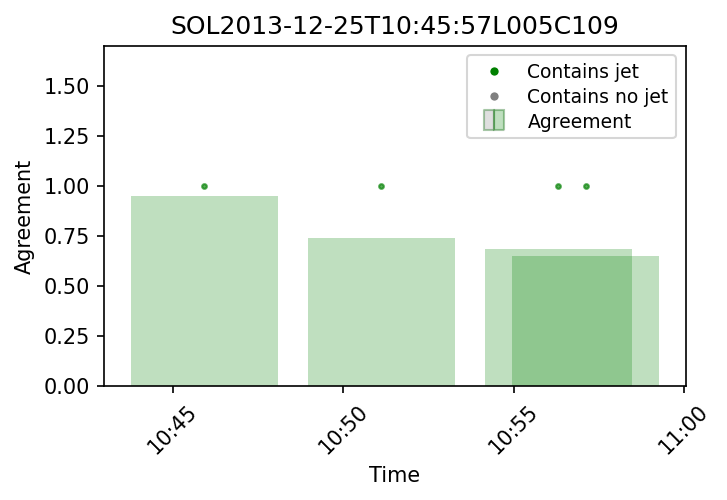

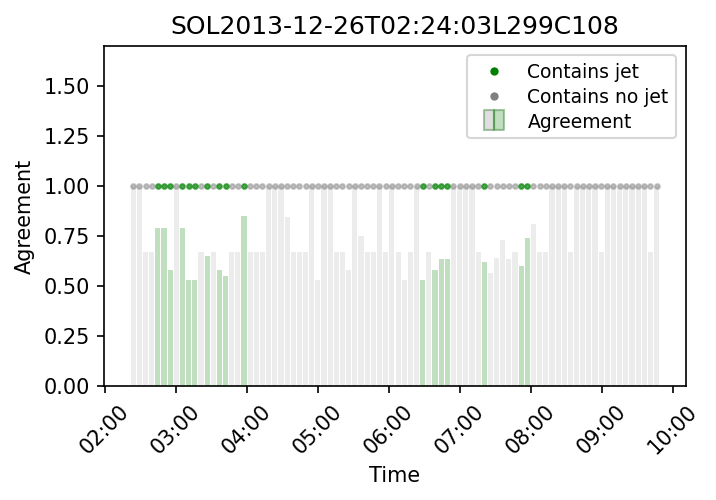

In [7]:
for sol in metafile.SOL_unique:
    sol_subjects = metafile.get_subjectid_by_solstandard(sol)
    data_sol = data_Tc.get_data_by_idlist(sol_subjects)
    # Calculate the agreement
    agreement, jet_mask, non_jet_mask, Ans = data_Tc.Agr_mask(data_sol)
    obs_time = metafile.get_subjectkeyvalue_by_solstandard(sol, 'startDate')
    plot_agreement(sol, obs_time, agreement, jet_mask, non_jet_mask)